<a href="https://colab.research.google.com/github/camiledesma/Proyecto-final/blob/main/EDA-Yelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import os
import json
import ast
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

# **lectura review.json**

**Contiene las reseñas completas, incluyendo el user_id que escribió el review y el business_id por el cual se escribe la reseña**

/**/ string, 22 caracteres id de reseña**

"review_id": "zdSx_SD6obEhz9VrW9uAWA",

**// string, 22 caracteres id único de usuario, refiere al usuario en user.json**

"user_id": "Ha3iJu77CxlrFm-vQRs_8g"

**// string, 22 caracteres id del negocio, refiere al negocio en business.json**

"business_id": "tnhfDv5Il8EaGSXZGiuQGg"

**// entero, puntaje en estrellas de 1 al 5**

"stars": 4,

**// string, fecha formato YYYY-MM-DD**

"date": "2016-03-09",


**// string, la reseña en inglés**

"text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

**// entero, números de votos como reseña útil**

"useful": 0,

**// entero, número de votos como reseña graciosa**

"funny": 0,

**// entero, número de votos como reseña cool.**

"cool": 0






In [ ]:

ruta_archivo = '/content/drive/MyDrive/proyecto_final/Yelp/review.json'


df_gral_review = pd.read_json(ruta_archivo, lines=True)


df_gral_review = pd.json_normalize(df_gral_review.to_dict(orient='records'))

print(df_gral_review.head())


                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.

In [ ]:
df_gral_review.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18


**Limpieza y verificacion elementos nulos**

In [ ]:
df_gral_review.shape

(6990280, 9)

In [ ]:
df_gral_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


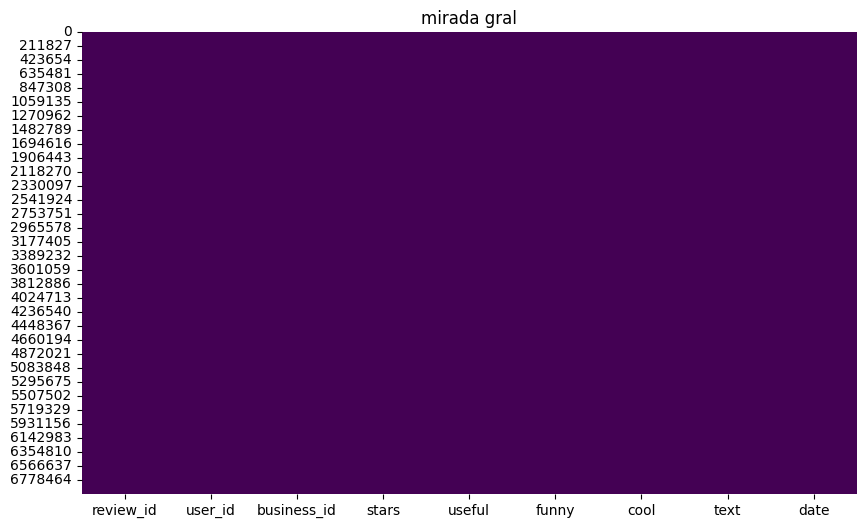

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral_review.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_gral_review.isnull().sum() # Revisamos si hay valores nulos.

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [ ]:
df_gral_review.duplicated().sum() # Revisamos si hay valores duplicados.

0

**Desanidar columna date**

In [ ]:
# Desanidar la columna "date"
desanidados = []  # Lista vacía para almacenar los datos desanidados.

for _, row in df_gral_review.iterrows():
    review_id = row['review_id']
    user_id = row['user_id']
    business_id = row['business_id']
    stars = row['stars']
    useful = row['useful']
    funny = row['funny']
    cool = row['cool']
    text = row['text']

    for datetime_str in str(row['date']).split(', '):
      datetime_parts = datetime_str.split(' ')
      date = datetime_parts[0]
      hour = datetime_parts[1] if len(datetime_parts) > 1 else None  # Usamos None si no hay hora disponible
      desanidados.append([review_id, user_id, business_id, stars, useful, funny, cool, text, date, hour])

df_desanidado = pd.DataFrame(desanidados, columns=['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date', 'hour'])


In [ ]:
muestra_review = df_desanidado[0:1000000]

In [ ]:
muestra_review.head(4)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,hour
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07,None
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03,None
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05,None
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04,None


In [ ]:
muestra_review.to_csv("/content/drive/MyDrive/muestra_review.csv", index= True)


***ANALISIS EXPLORATORIO DE DATOS - REVIEW***

***puntaje en stars***

In [ ]:
len(muestra_review['stars'].unique())

5

In [ ]:
value_counts = muestra_review["stars"].value_counts()

In [ ]:
value_counts

5    458612
4    221897
1    138625
3    102954
2     77912
Name: stars, dtype: int64

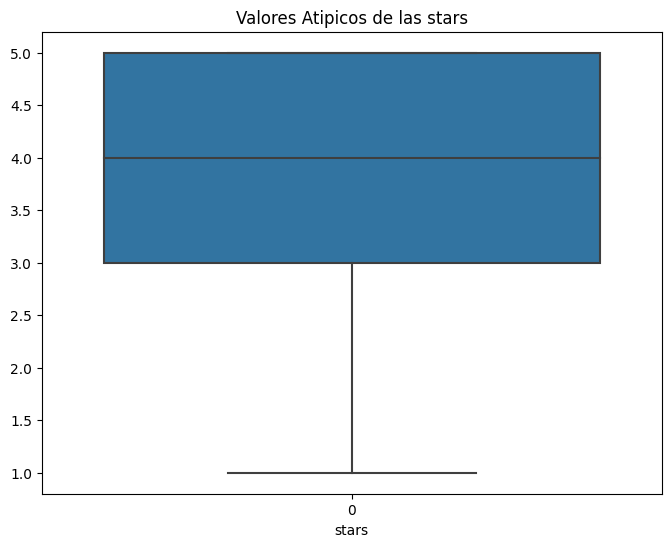

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(muestra_review['stars'])
plt.xlabel('stars')
plt.title('Valores Atipicos de las stars')
plt.show()

**Resumen Estadístico**

                stars          useful           funny            cool
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000
mean         3.783959        1.106594        0.307812        0.457129
std          1.440197        2.848906        1.428185        1.799114
min          1.000000        0.000000        0.000000        0.000000
25%          3.000000        0.000000        0.000000        0.000000
50%          4.000000        0.000000        0.000000        0.000000
75%          5.000000        1.000000        0.000000        0.000000
max          5.000000      539.000000      284.000000      172.000000


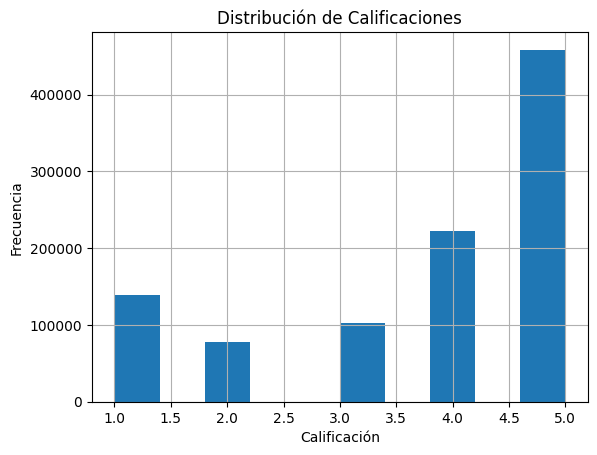

In [ ]:
# Resumen estadístico
print(muestra_review.describe())

# Histograma de calificaciones
muestra_review['stars'].hist()
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()


**reseña useful**

In [ ]:
len(muestra_review['useful'].unique())

147

In [ ]:
value_counts = muestra_review["useful"].value_counts()

In [ ]:
value_counts

0      562838
1      217272
2       95675
3       47406
4       25729
        ...  
346         1
152         1
190         1
115         1
156         1
Name: useful, Length: 147, dtype: int64

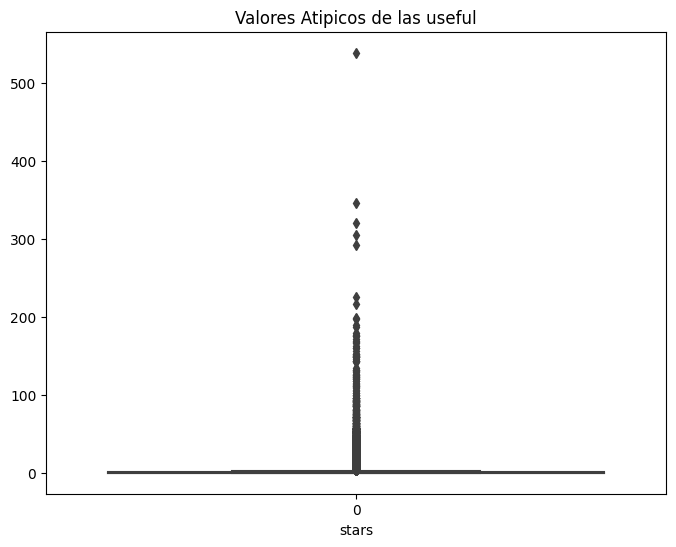

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(muestra_review['useful'])
plt.xlabel('stars')
plt.title('Valores Atipicos de reseña useful')
plt.show()

**reseña funny**

In [ ]:
len(muestra_review['funny'].unique())

91

In [ ]:
value_counts = muestra_review["funny"].value_counts()

In [ ]:
value_counts

0      847490
1       96745
2       27418
3       11474
4        5718
        ...  
48          1
61          1
242         1
113         1
92          1
Name: funny, Length: 91, dtype: int64

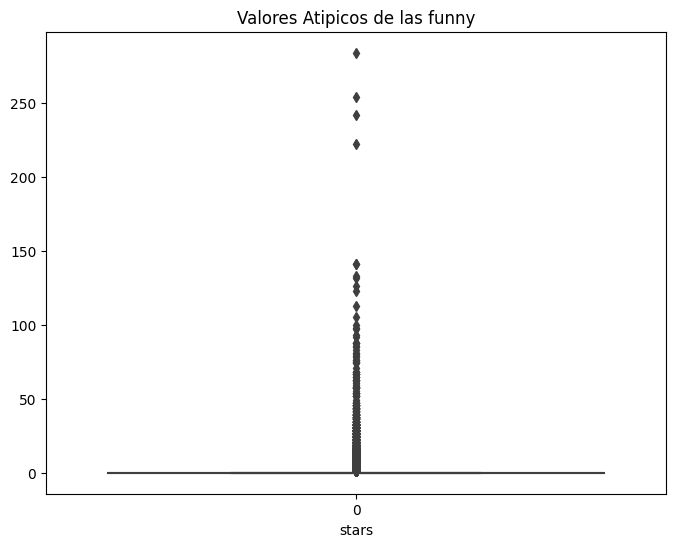

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(muestra_review['funny'])
plt.xlabel('stars')
plt.title('Valores Atipicos de reseña funny')
plt.show()

**reseña cool**

In [ ]:
len(muestra_review['cool'].unique())

113

In [ ]:
value_counts = muestra_review["cool"].value_counts()

In [ ]:
value_counts

0      776706
1      142508
2       41345
3       15857
4        7651
        ...  
83          1
130         1
88          1
146         1
102         1
Name: cool, Length: 113, dtype: int64

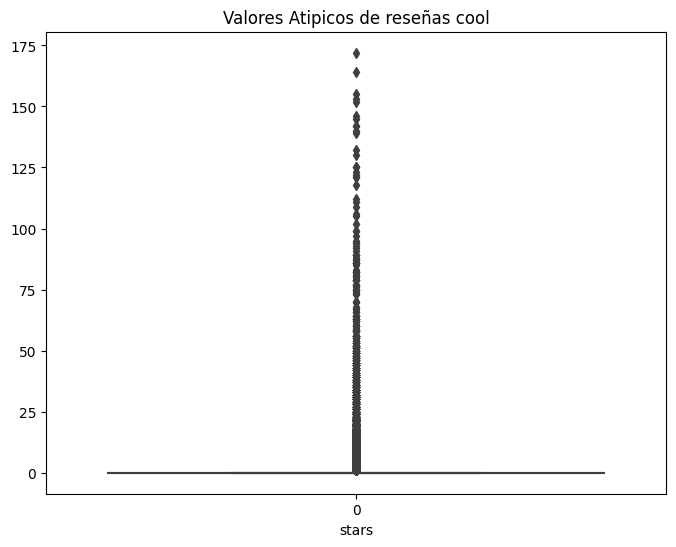

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(muestra_review['cool'])
plt.xlabel('stars')
plt.title('Valores Atipicos de reseñas cool')
plt.show()

**Histogramas Comparativos**

**Visualizacion de la distribución de las reseñas en términos de "useful", "funny" y "cool" mediante histogramas comparativos**

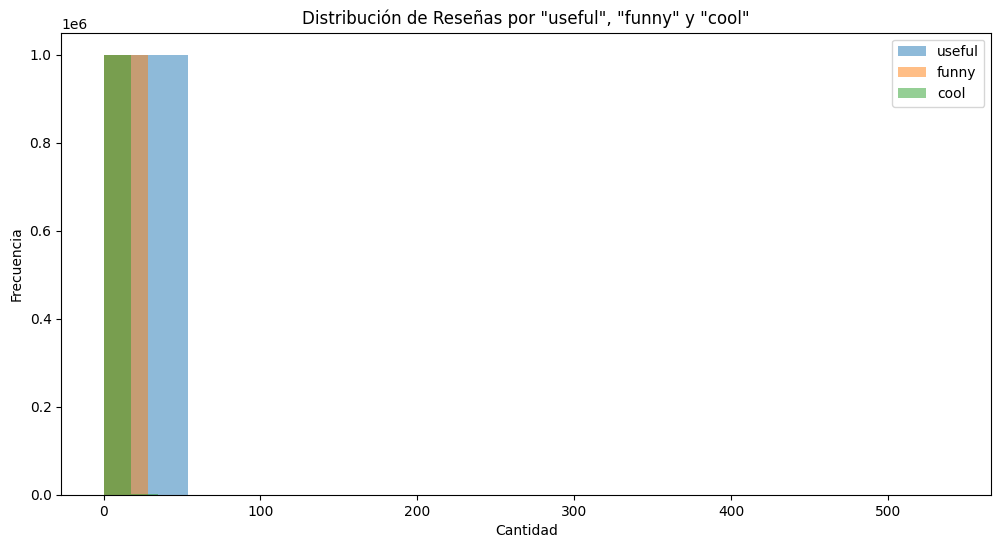

In [ ]:
# Histograma comparativo para "useful", "funny" y "cool"
plt.figure(figsize=(12, 6))
for columna in ['useful', 'funny', 'cool']:
    muestra_review[columna].plot(kind='hist', alpha=0.5, label=columna)

plt.title('Distribución de Reseñas por "useful", "funny" y "cool"')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


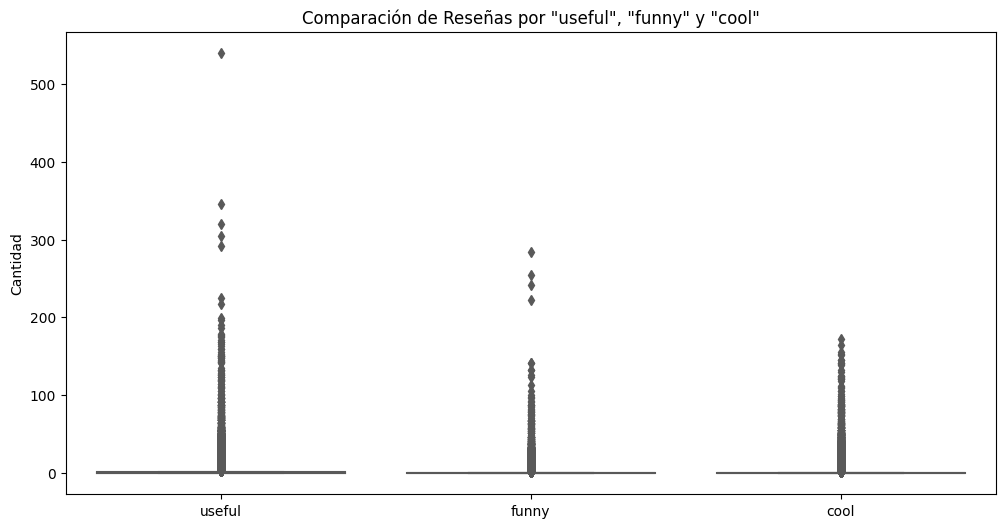

In [ ]:
# Boxplot comparativo
plt.figure(figsize=(12, 6))
sns.boxplot(data=muestra_review[['useful', 'funny', 'cool']], palette='Set2')
plt.title('Comparación de Reseñas por "useful", "funny" y "cool"')
plt.ylabel('Cantidad')
plt.show()


***Date***

In [ ]:
len(muestra_review['date'].unique())

5831

In [ ]:
value_counts = muestra_review["date"].value_counts()

In [ ]:
value_counts

2018-07-08    628
2018-07-22    573
2018-04-08    567
2018-06-24    556
2018-03-04    556
             ... 
2005-07-16      1
2005-10-17      1
2005-07-07      1
2005-06-17      1
2007-05-05      1
Name: date, Length: 5831, dtype: int64

**Tendencias Temporales**

***Visualizar la distribución de las revisiones a lo largo del tiempo. Puedes crear un gráfico de líneas que muestre la cantidad de revisiones por fecha***

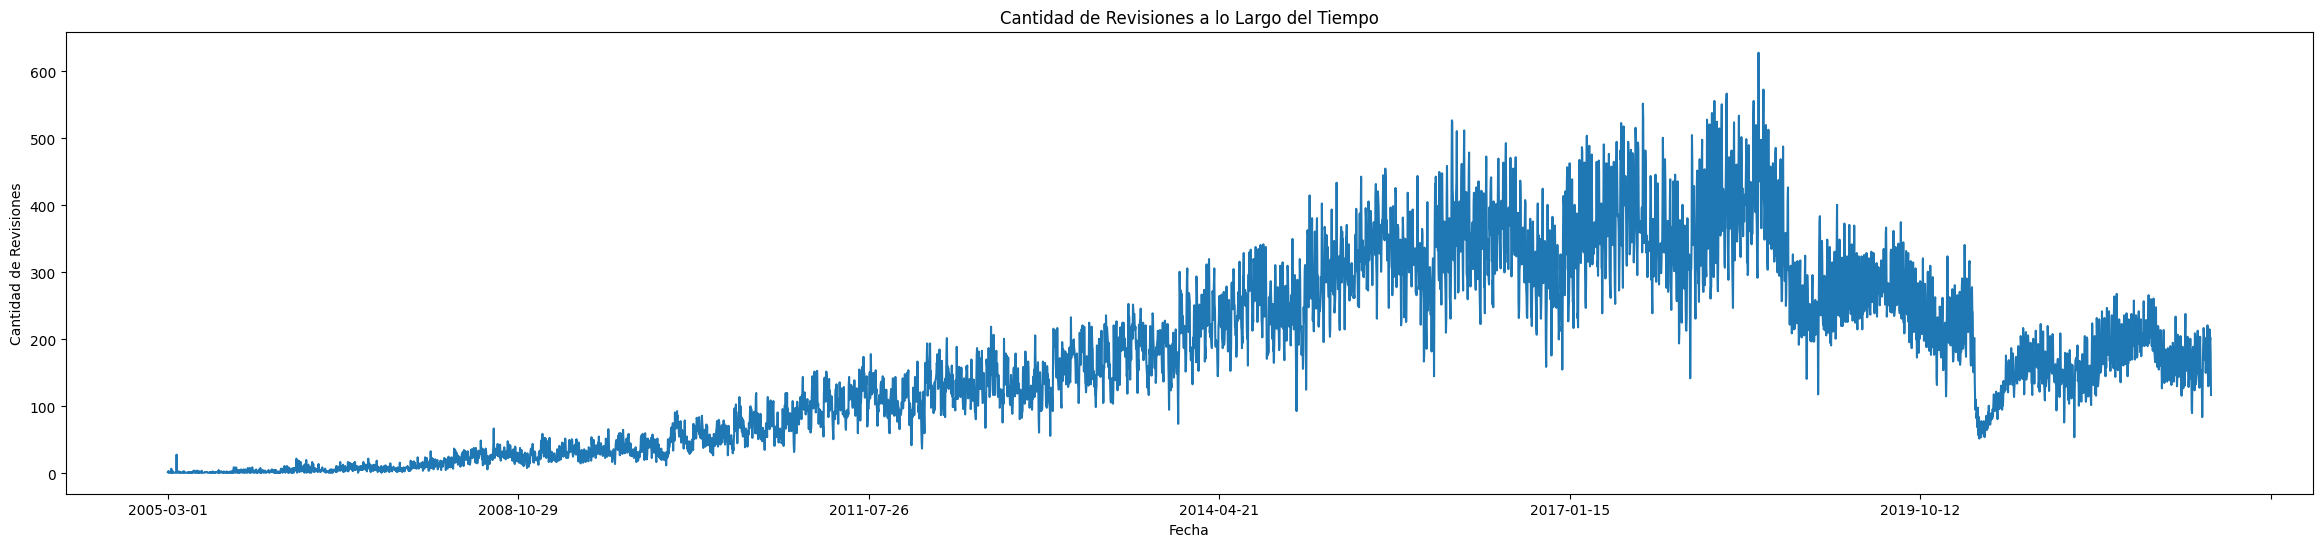

In [ ]:

revisiones_por_fecha = muestra_review['date'].value_counts().sort_index()

# Gráfico de líneas
plt.figure(figsize=(29, 6))
revisiones_por_fecha.plot()
plt.title('Cantidad de Revisiones a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Revisiones')
plt.show()


***Análisis Estacional***

***Explorar patrones estacionales o variaciones a lo largo de los meses o días de la semana.***

<ipython-input-95-d848fe818ebb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-d848fe818ebb>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-d848fe818ebb>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



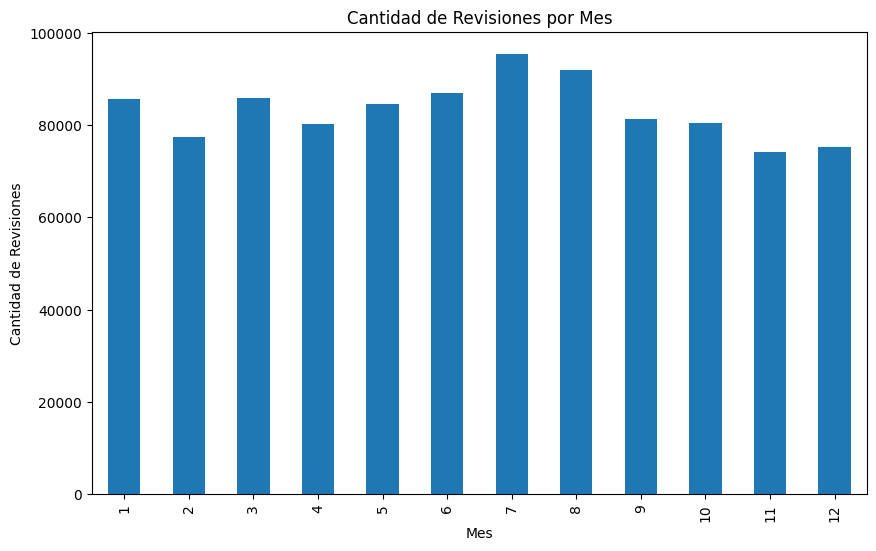

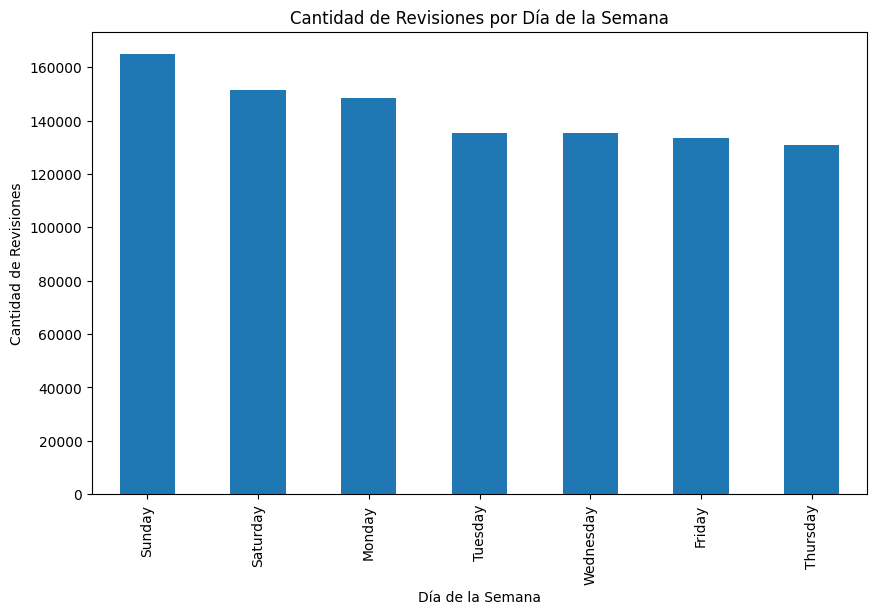

In [ ]:

muestra_review['date'] = pd.to_datetime(muestra_review['date'], errors='coerce')


muestra_review['mes'] = muestra_review['date'].dt.month
muestra_review['dia_semana'] = muestra_review['date'].dt.day_name()

# Gráfico de barras para la cantidad de revisiones por mes
plt.figure(figsize=(10, 6))
muestra_review['mes'].value_counts().sort_index().plot(kind='bar')
plt.title('Cantidad de Revisiones por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Revisiones')
plt.show()

# Gráfico de barras para la cantidad de revisiones por día de la semana
plt.figure(figsize=(10, 6))
muestra_review['dia_semana'].value_counts().plot(kind='bar')
plt.title('Cantidad de Revisiones por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Revisiones')
plt.show()


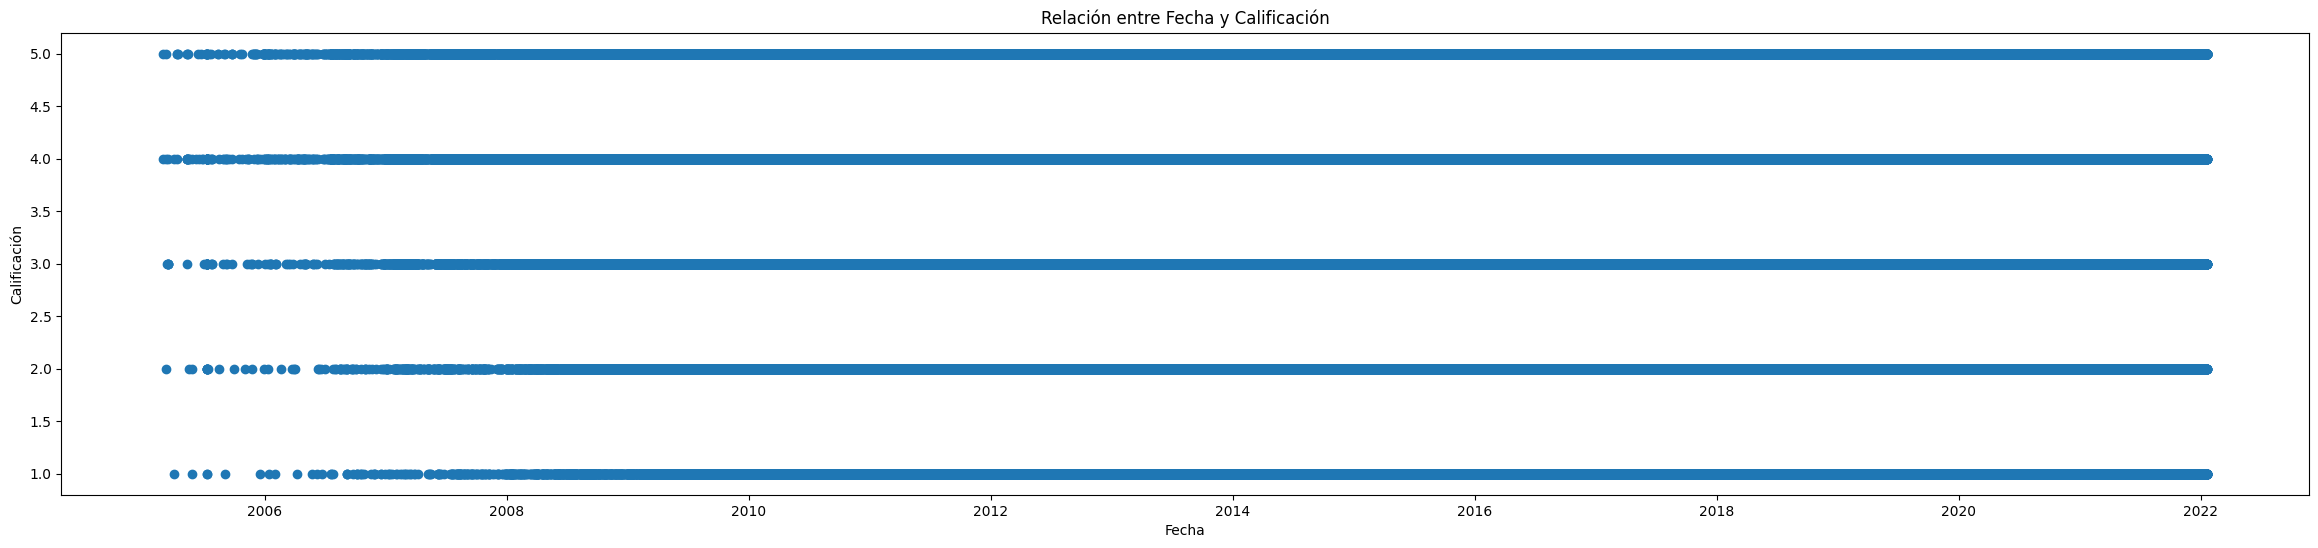

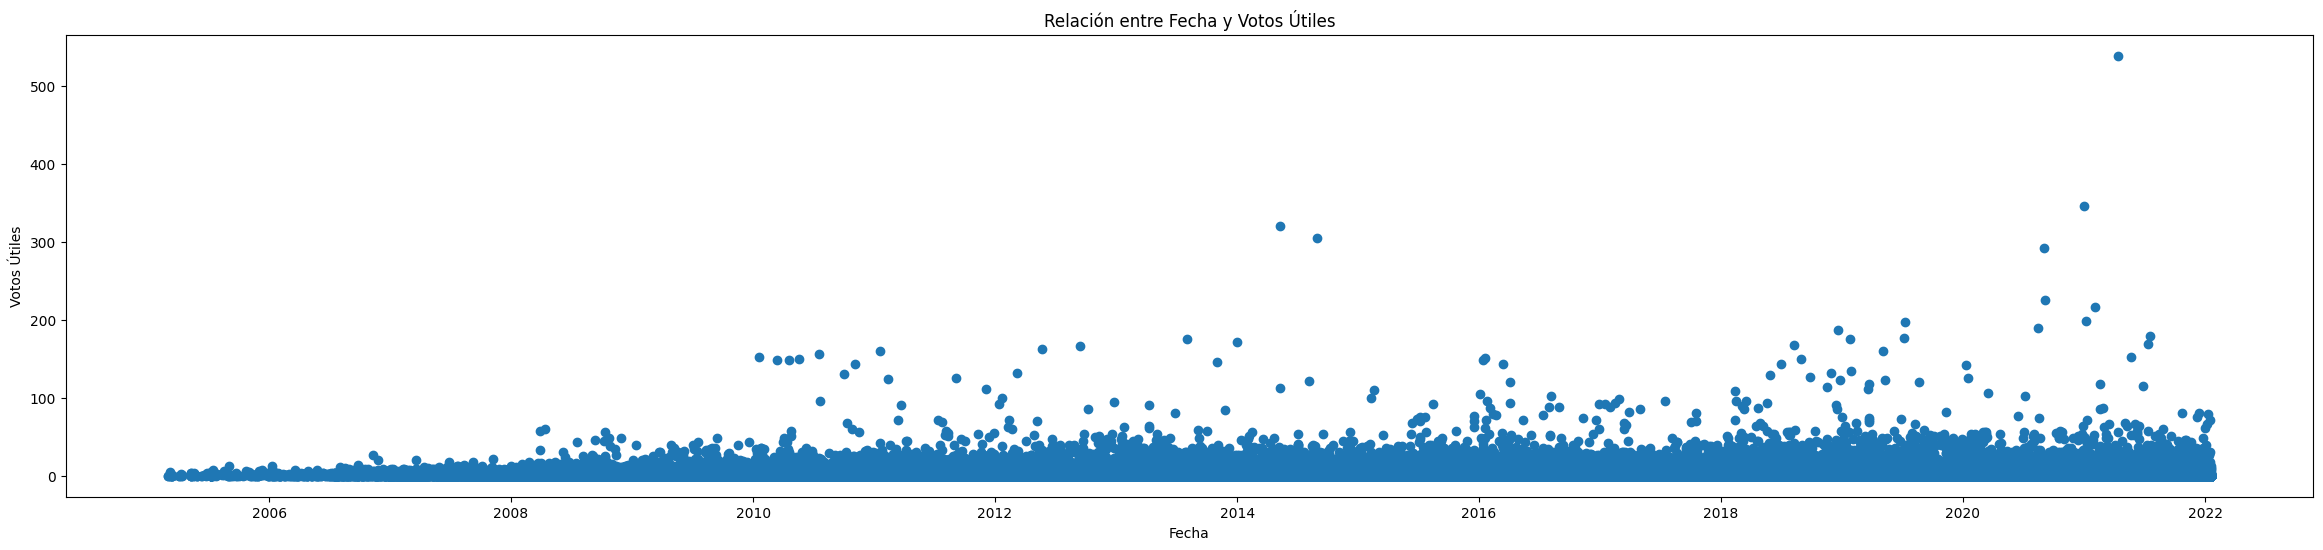

In [ ]:
# Gráfico de dispersión para la relación entre fecha y calificación
plt.figure(figsize=(29, 6))
plt.scatter(muestra_review['date'], muestra_review['stars'])
plt.title('Relación entre Fecha y Calificación')
plt.xlabel('Fecha')
plt.ylabel('Calificación')
plt.show()

# Gráfico de dispersión para la relación entre fecha y votos útiles
plt.figure(figsize=(29, 6))
plt.scatter(muestra_review['date'], muestra_review['useful'])
plt.title('Relación entre Fecha y Votos Útiles')
plt.xlabel('Fecha')
plt.ylabel('Votos Útiles')
plt.show()


**Análisis de Correlación**

<ipython-input-64-54e75c2ff9fe>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



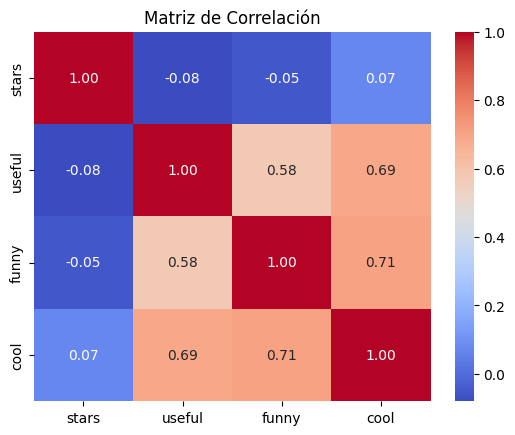

In [ ]:
# Matriz de correlación
correlacion = muestra_review.corr()

# Visualizar la matriz de correlación
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


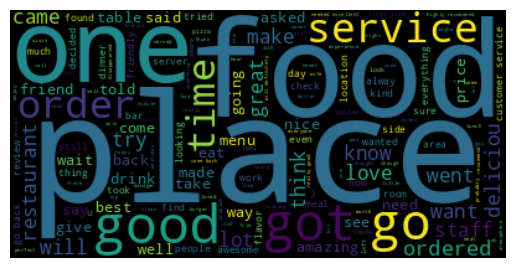

In [ ]:
# Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# Convertimos todos los valores en la columna 'review' a cadenas de texto
text = " ".join(str(text) for text in muestra_review.text)

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Lectura user.parquet**

** Data del usuario incluyendo referencias a otros usuarios amigos y a toda la metadata asociada al usuario.**

// string, 22 caracteres, id de usuario que refiere al usuario en user.json

"user_id": "Ha3iJu77CxlrFm-vQRs_8g"

**// string, nombre del usuario**

"name": "Sebastien"


**// entero, numero de reseñas escritas**

"review_count": 56

**// string, fecha de creacion del usuario en Yelp en formato YYYY-MM-DD**

"yelping_since": "2011-01-01"

**// lista con los id de usuarios que son amigos de ese usuario**

"friends": [

    "wqoXYLWmpkEH0YvTmHBsJQ",

    "KUXLLiJGrjtSsapmxmpvTA",

    "6e9rJKQC3n0RSKyHLViL-Q"

],

**// entero, número de votos marcados como útiles por el usuario**

"useful": 21

**// entero, número de votos marcados como graciosos por el usuario**

"funny": 88,

**// entero, número de votos marcados como cool por el usuario**

"cool": 15,

**// entero, número de fans que tiene el usuario**

"fans": 1032,

**// lista de enteros, años en los que el usuario fue miembro elite**

"elite": [

    2012,

    2013

],

**// float, promedio del valor de las reseñas**

"average_stars": 4.31,

**// entero, total de cumplidos 'hot' recibidos por el usuario**

"compliment_hot": 339,

**// entero, total de cumplidos varios recibidos por el usuario**

"compliment_more": 668,

**// entero, total de cumplidos por el perfil recibidos por el usuario**

"compliment_profile": 42,

// entero, total de cumplidos 'cute' recibidos por el usuario
"compliment_cute": 62,

**// entero, total de listas de cumplidos recibidos por el usuario**

"compliment_list": 37,

**// entero, total de cumplidos como notas recibidos por el usuario**

"compliment_note": 356,

**// entero, total de cumplidos planos recibidos por el usuario**

"compliment_plain": 68,

**// entero, total de cumplidos 'cool' recibidos por el usuario**

"compliment_cool": 91,

**// entero, total de cumplidos graciosos recibidos por el usuario**

"compliment_funny": 99,

**// entero, número de complidos escritos recibidos por el usuario**

"compliment_writer": 95,

**// entero, número de cumplidos en foto recibidos por el usuario**

"compliment_photos": 50




In [ ]:

ruta_archivo_parquet = '/content/drive/MyDrive/proyecto_final/Yelp/user.parquet'

df_user = pd.read_parquet(ruta_archivo_parquet)


In [ ]:
df_user.head(4)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9


In [ ]:
df_user.shape

(2105597, 22)

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


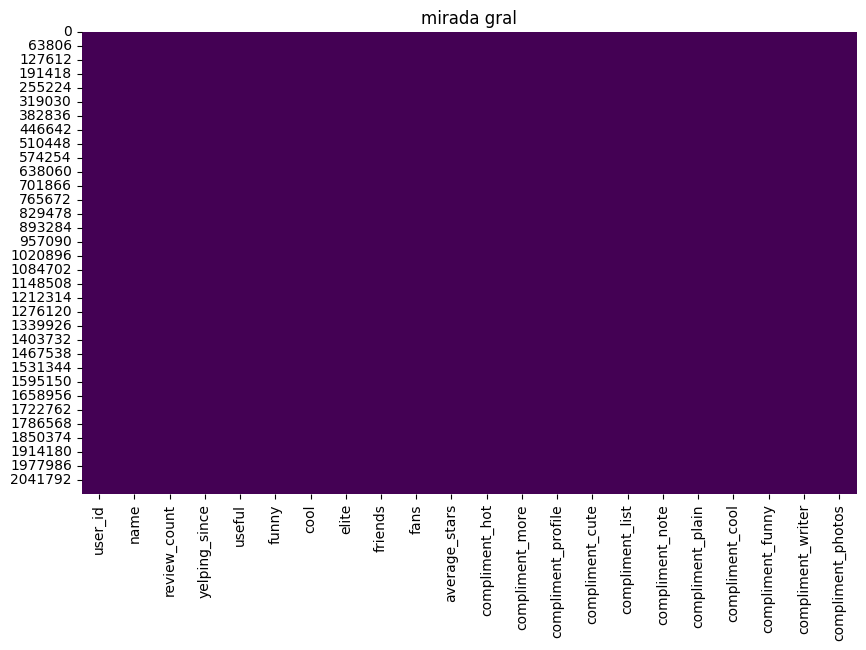

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_user.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_user.isnull().sum() # Revisamos si hay valores nulos.

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [ ]:
df_user.duplicated().sum() # Revisamos si hay valores duplicados.

117700

In [ ]:
df_user.drop_duplicates(inplace=True)

***Analsis Exploratorio de Datos - User***

**Resumen Estadístico**

In [ ]:
print(df_user.describe())


       review_count        useful         funny          cool          fans  \
count  1.987897e+06  1.987897e+06  1.987897e+06  1.987897e+06  1.987897e+06   
mean   2.339441e+01  4.229634e+01  1.697054e+01  2.379291e+01  1.465740e+00   
std    8.256699e+01  6.414806e+02  4.078034e+02  5.653513e+02  1.813075e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    5.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.700000e+01  1.300000e+01  2.000000e+00  3.000000e+00  0.000000e+00   
max    1.747300e+04  2.062960e+05  1.858230e+05  1.998780e+05  1.249700e+04   

       average_stars  compliment_hot  compliment_more  compliment_profile  \
count   1.987897e+06    1.987897e+06     1.987897e+06        1.987897e+06   
mean    3.630494e+00    1.807072e+00     2.922631e-01        1.793176e-01   
std     1.183337e+00    7.360184e+01     1.282467e+01    

**Distribución de Review Count y Average Stars**

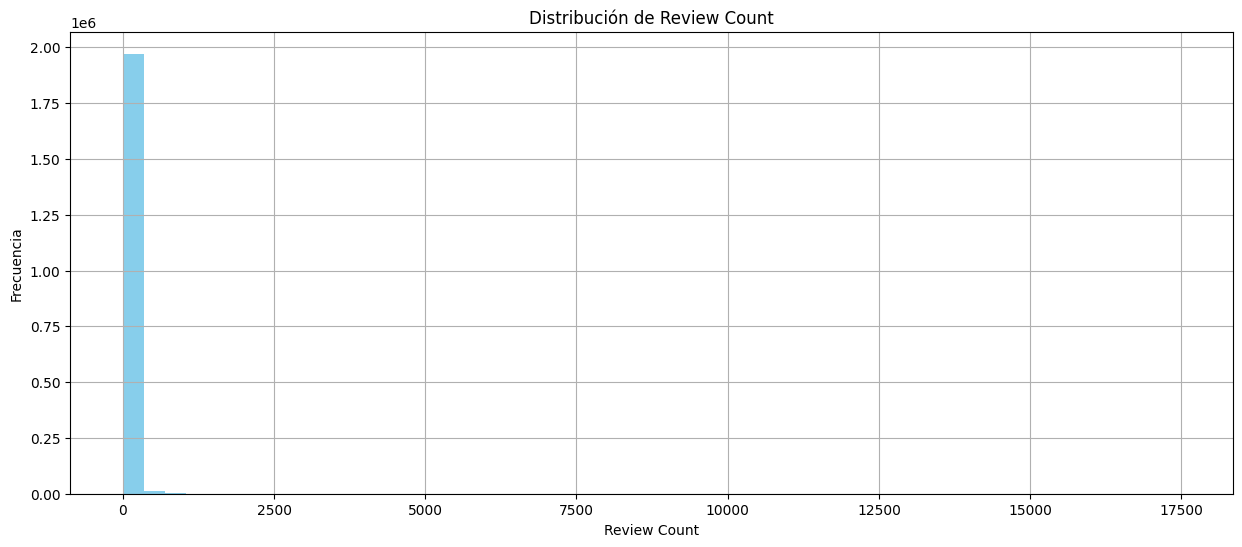

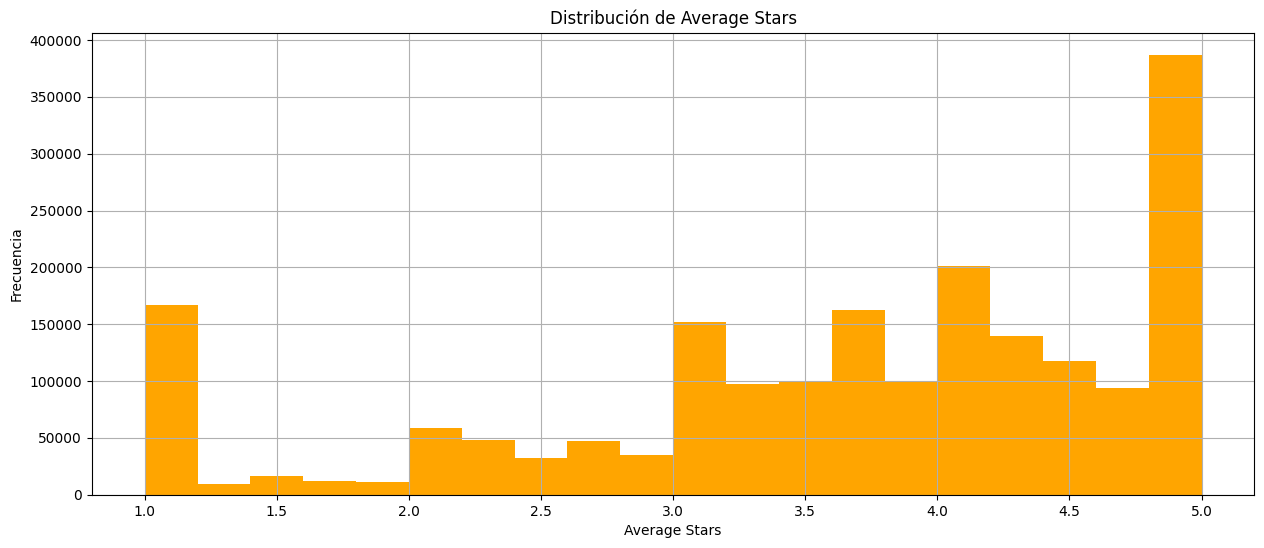

In [ ]:
# Histograma para "review_count"
plt.figure(figsize=(15, 6))
df_user['review_count'].hist(bins=50, color='skyblue')
plt.title('Distribución de Review Count')
plt.xlabel('Review Count')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para "average_stars"
plt.figure(figsize=(15, 6))
df_user['average_stars'].hist(bins=20, color='orange')
plt.title('Distribución de Average Stars')
plt.xlabel('Average Stars')
plt.ylabel('Frecuencia')
plt.show()


***Relación entre Variables***

**relación entre las variables numéricas, como "review_count" y "fans"**

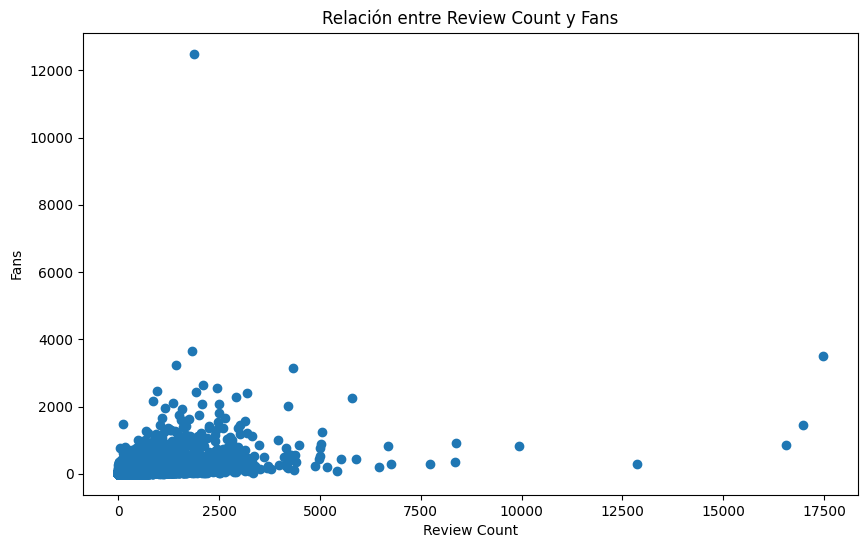

In [ ]:
# Gráfico de dispersión entre "review_count" y "fans"
plt.figure(figsize=(10, 6))
plt.scatter(df_user['review_count'], df_user['fans'])
plt.title('Relación entre Review Count y Fans')
plt.xlabel('Review Count')
plt.ylabel('Fans')
plt.show()


***Análisis de Fechas (Yelping Since)***

**Convierte la columna "yelping_since" a tipo de datos datetime y realiza análisis temporal**

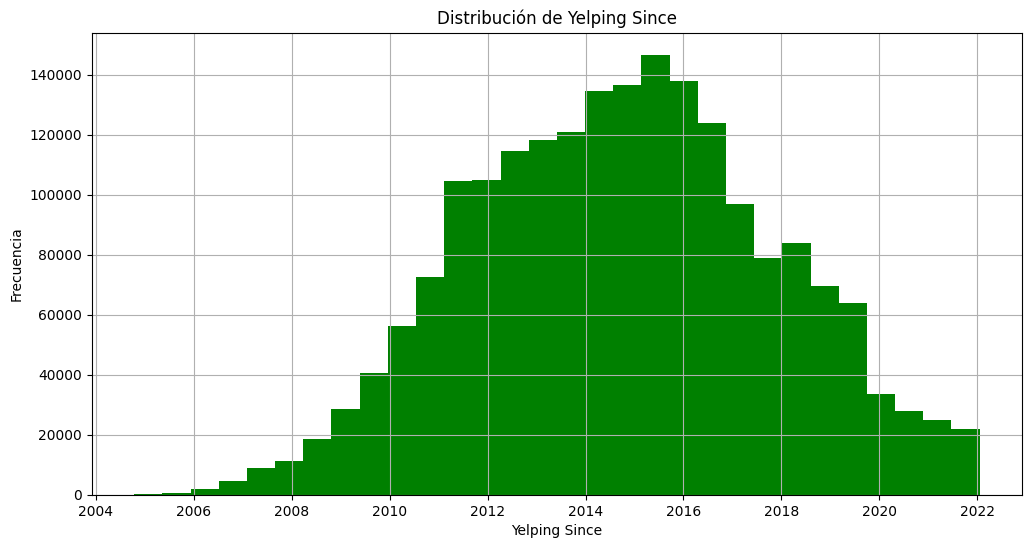

In [ ]:
# Convertir la columna "yelping_since" a tipo datetime
df_user['yelping_since'] = pd.to_datetime(df_user['yelping_since'], errors='coerce')

# Histograma de distribución de Yelping Since
plt.figure(figsize=(12, 6))
df_user['yelping_since'].hist(bins=30, color='green')
plt.title('Distribución de Yelping Since')
plt.xlabel('Yelping Since')
plt.ylabel('Frecuencia')
plt.show()


***Correlación entre Variables***

**matriz de correlación para comprender las relaciones lineales entre las variables numéricas**

<ipython-input-20-0c3fec73bb95>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



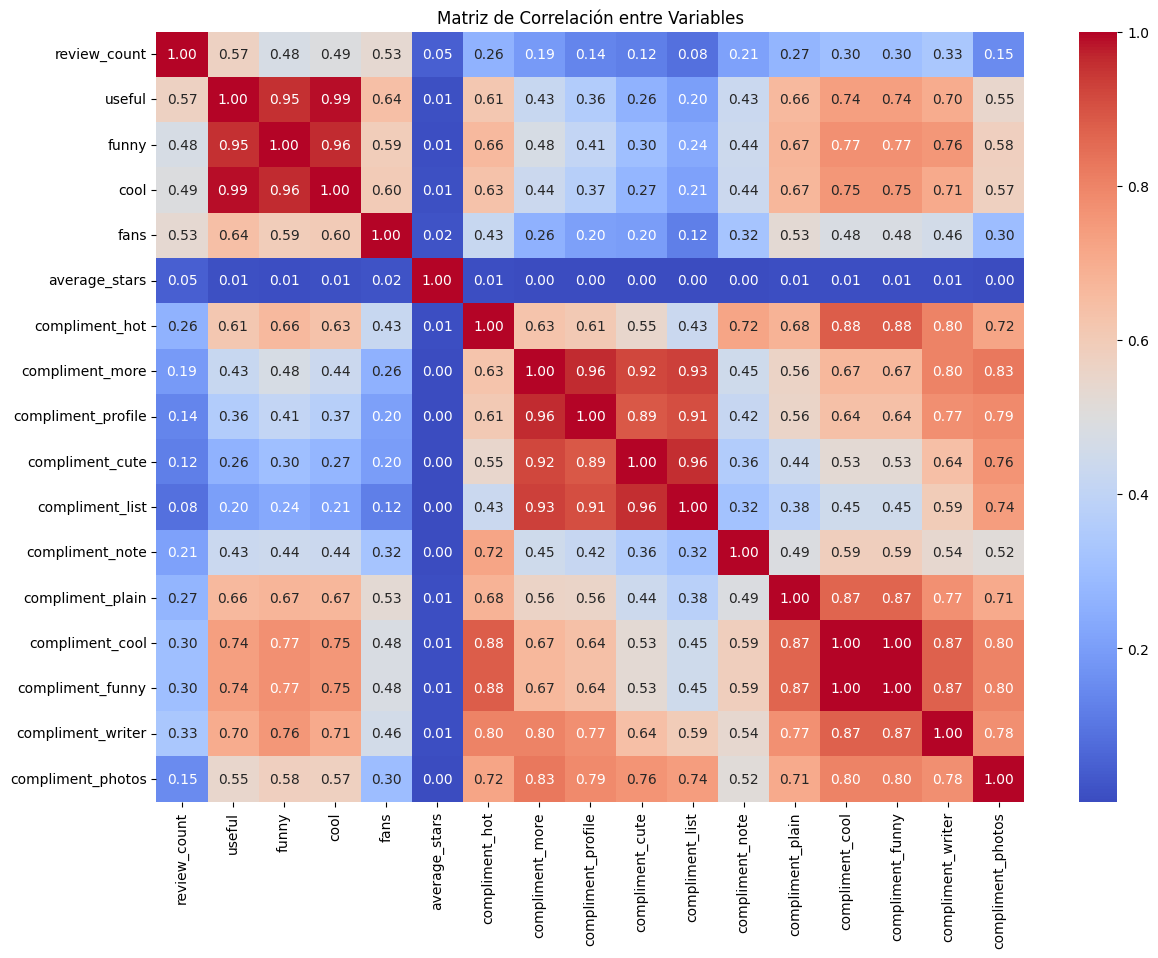

In [ ]:
# Matriz de correlación
correlacion_user = df_user.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlacion_user, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables')
plt.show()


**Diagrama de Caja (Boxplot):**

**Un boxplot herramienta efectiva para visualizar la distribución y detectar valores atípicos**

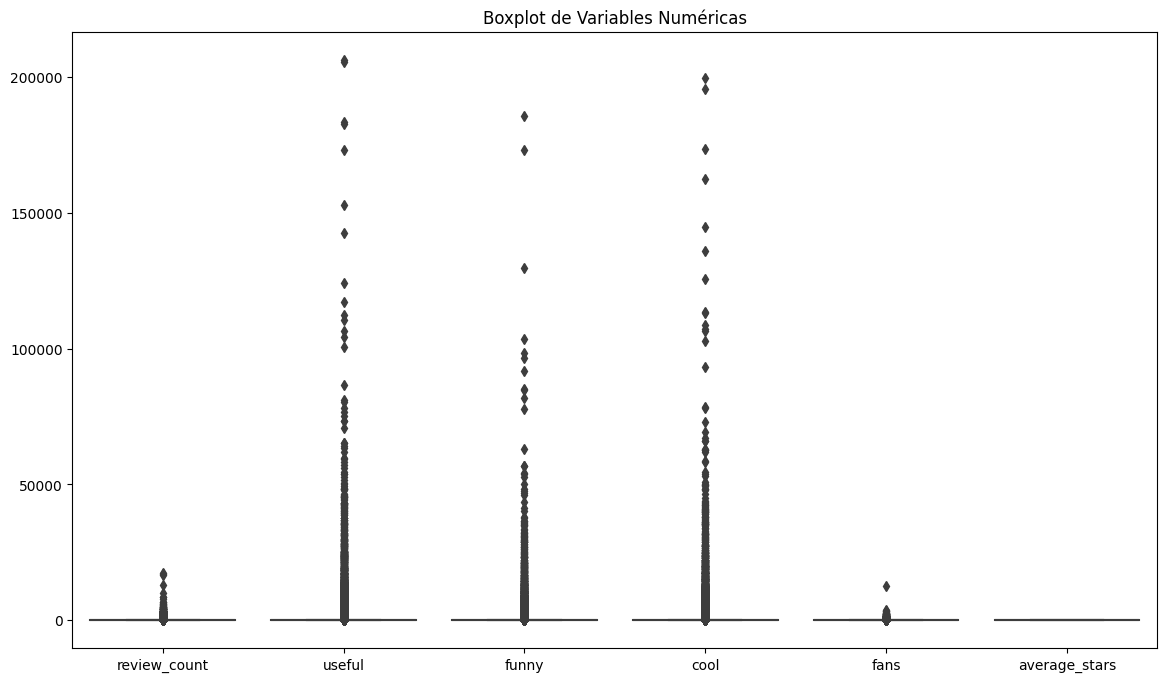

In [ ]:

variables_numericas = ['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars']

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_user[variables_numericas])
plt.title('Boxplot de Variables Numéricas')
plt.show()


**Visualización de Scatterplots para Relaciones**

**Utiliza scatterplots para explorar relaciones y detectar valores atípicos en comparación con otras variables.**

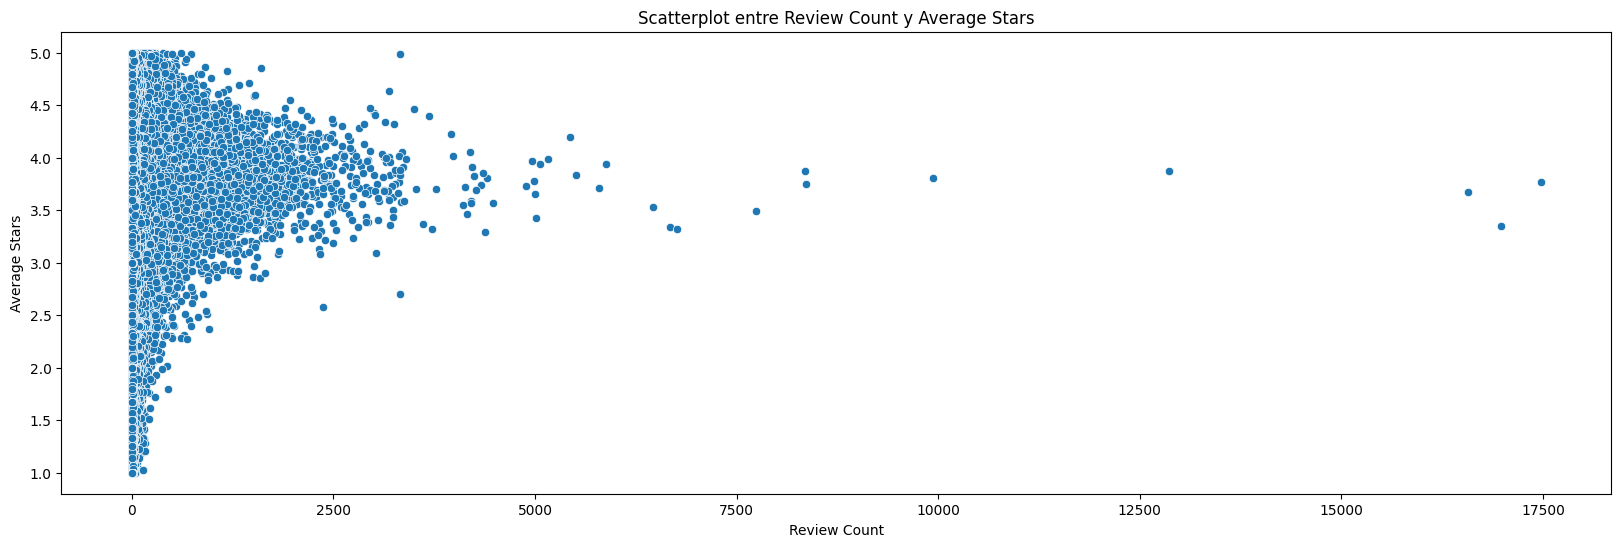

In [ ]:
# Scatterplot para "review_count" vs "average_stars"
plt.figure(figsize=(20, 6))
sns.scatterplot(x='review_count', y='average_stars', data=df_user)
plt.title('Scatterplot entre Review Count y Average Stars')
plt.xlabel('Review Count')
plt.ylabel('Average Stars')
plt.show()


In [ ]:
#Guardar el DataFrame en un archivo CSV
#df_user.to_csv("/content/drive/MyDrive/user.csv", index=True)

# **Lectura de Tip.json**

**Tips (consejos) escritos por el usuario. Los tips son más cortas que las reseñas y tienden a dar sugerencias rápidas.**

**// string, texto del tip**

"text": "Secret menu - fried chicken sando is da bombbbbbb Their zapatos are good too.",

**// string, fecha cuando se escribio el tip YYYY-MM-DD**

"date": "2013-09-20",

**// entero, cuantos cumplidos totales tiene**

"compliment_count": 172,

**// string, 22 caracteres, id del negocio que se refiere al negocio en business.json**

"business_id": "tnhfDv5Il8EaGSXZGiuQGg",

**// string, 22 caracteres de id de usuario, que se refieren al usuario en user.json**

"user_id": "49JhAJh8vSQ-vM4Aourl0g"


In [ ]:

ruta_archivo = '/content/drive/MyDrive/proyecto_final/Yelp/tip.json'

# Leer el archivo JSON en un DataFrame
df_gral_tip = pd.read_json(ruta_archivo, lines=True)

# Normalizar datos JSON anidados
df_gral_tip = pd.json_normalize(df_gral_tip.to_dict(orient='records'))


print(df_gral_tip.head())


                  user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3  FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4  ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   

                                                text                date  \
0                     Avengers time with the ladies. 2012-05-18 02:17:21   
1  They have lots of good deserts and tasty cuban... 2013-02-05 18:35:10   
2             It's open even when you think it isn't 2013-08-18 00:56:08   
3                          Very decent fried chicken 2017-06-27 23:05:38   
4             Appetizers.. platter special for lunch 2012-10-06 19:43:09   

   compliment_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [ ]:
df_gral_tip.head(5)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [ ]:
df_gral_tip.shape

(908915, 5)

In [ ]:
df_gral_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


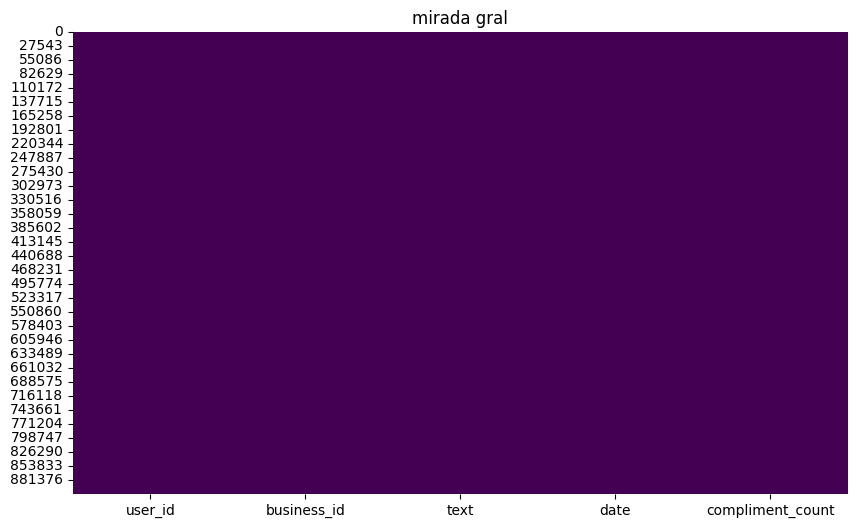

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral_tip.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_gral_tip.isnull().sum() # Revisamos si hay valores nulos.

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [ ]:
df_gral_tip.duplicated().sum() # Revisamos si hay valores duplicados.

67

In [ ]:
df_gral_tip = df_gral_tip.drop_duplicates()


In [ ]:
df_gral_tip.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
908910    False
908911    False
908912    False
908913    False
908914    False
Length: 908848, dtype: bool

**Desanidar**

In [ ]:
# Desanidar la columna "date"
desanidados = []  # Lista vacía para almacenar los datos desanidados.

for _, row in df_gral_tip.iterrows():
    user_id = row['user_id']
    business_id = row['business_id']
    text = row['text']

    for datetime_str in str(row['date']).split(', '):
        datetime_parts = datetime_str.split(' ')
        date = datetime_parts[0]
        hour = datetime_parts[1] if len(datetime_parts) > 1 else None  # Usamos None si no hay hora disponible
        complement_count = row['compliment_count']  # Puedes incluir otras columnas según sea necesario
        desanidados.append([user_id, business_id, text, date, hour, complement_count])

# Crear DataFrame desanidado
df_desanidado = pd.DataFrame(desanidados, columns=['user_id', 'business_id', 'text', 'date', 'hour', 'compliment_count'])

# Mostrar el DataFrame desanidado
print(df_desanidado)


                       user_id             business_id  \
0       AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1       NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2       -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3       FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4       ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   
...                        ...                     ...   
908843  eYodOTF8pkqKPzHkcxZs-Q  3lHTewuKFt5IImbXJoFeDQ   
908844  1uxtQAuJ2T5Xwa_wp7kUnA  OaGf0Dp56ARhQwIDT90w_g   
908845  v48Spe6WEpqehsF2xQADpg  hYnMeAO77RGyTtIzUSKYzQ   
908846  ckqKGM2hl7I9Chp5IpAhkw  s2eyoTuJrcP7I_XyjdhUHQ   
908847  4tF1CWdMxvvwpUIgGsDygA  _cb1Vg1NIWry8UA0jyuXnQ   

                                                     text        date  \
0                          Avengers time with the ladies.  2012-05-18   
1       They have lots of good deserts and tasty cuban...  2013-02-05   
2                  It's open even when you think it isn't  2013-08-18   
3          

In [ ]:
df_desanidado.head(4)

,user_id,business_id,text,date,hour,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18,02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05,18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18,00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27,23:05:38,0


In [ ]:
#Guardar el DataFrame en un archivo CSV
df_desanidado.to_csv("/content/drive/MyDrive/Tip.csv", index=True)

**Analsis Exploratorio de Datos - Tip**

**Text Column**

Resumen de la columna 'text':
count         908848
unique        851033
top       Great food
freq             597
Name: text, dtype: object


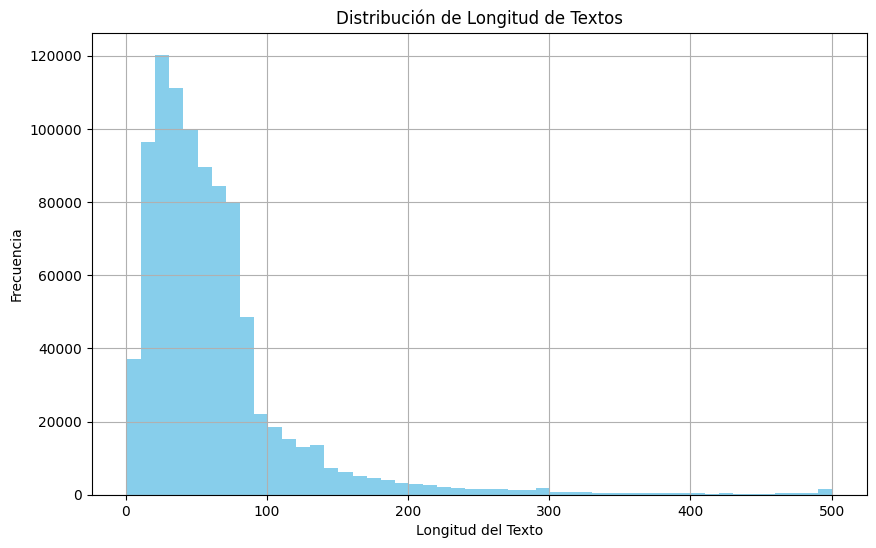

In [ ]:
# Análisis de la columna 'text'
print("Resumen de la columna 'text':")
print(df_desanidado['text'].describe())

# Visualización de la longitud de los textos
plt.figure(figsize=(10, 6))
df_desanidado['text'].apply(len).hist(bins=50, color='skyblue')
plt.title('Distribución de Longitud de Textos')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()


**Date Column**

Resumen de la columna 'date':
count                  908848
unique                   4626
top       2014-04-06 00:00:00
freq                      599
first     2009-04-16 00:00:00
last      2022-01-19 00:00:00
Name: date, dtype: object


<ipython-input-19-ae55b0e4d5e1>:6: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



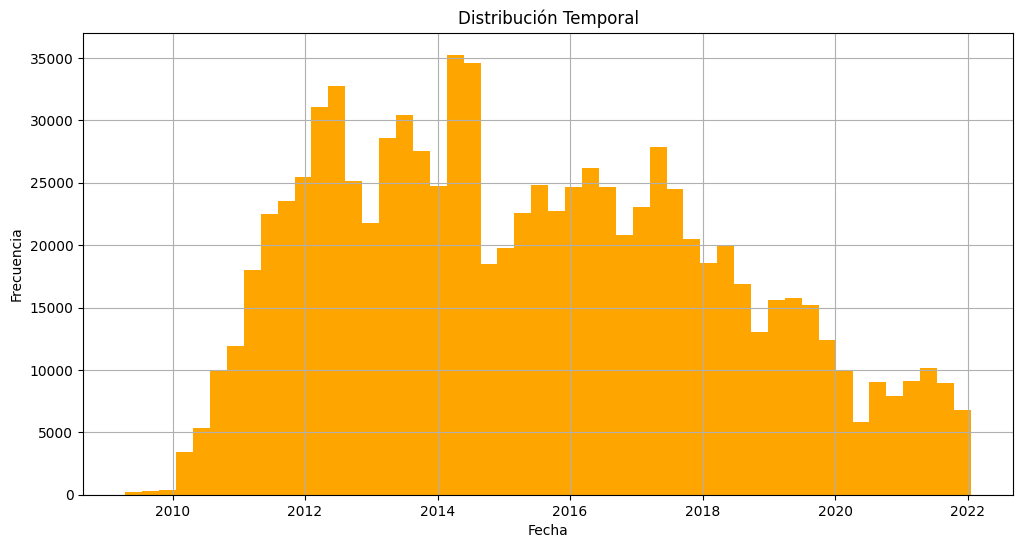

In [ ]:

df_desanidado['date'] = pd.to_datetime(df_desanidado['date'], errors='coerce')


print("Resumen de la columna 'date':")
print(df_desanidado['date'].describe())


plt.figure(figsize=(12, 6))
df_desanidado['date'].hist(bins=50, color='orange')
plt.title('Distribución Temporal')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.show()


**Compliment Count Column**

Resumen de la columna 'compliment_count':
count    908848.000000
mean          0.012526
std           0.120768
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: compliment_count, dtype: float64


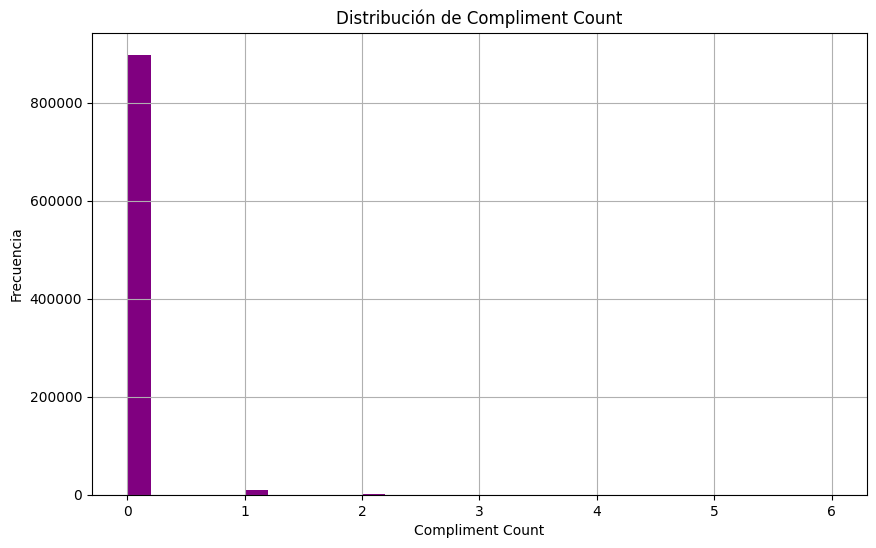

In [ ]:
# Análisis de la columna 'compliment_count'
print("Resumen de la columna 'compliment_count':")
print(df_desanidado['compliment_count'].describe())

# Visualización de la distribución de compliment_count
plt.figure(figsize=(10, 6))
df_desanidado['compliment_count'].hist(bins=30, color='purple')
plt.title('Distribución de Compliment Count')
plt.xlabel('Compliment Count')
plt.ylabel('Frecuencia')
plt.show()


**Relación entre Hour y Compliment Count**

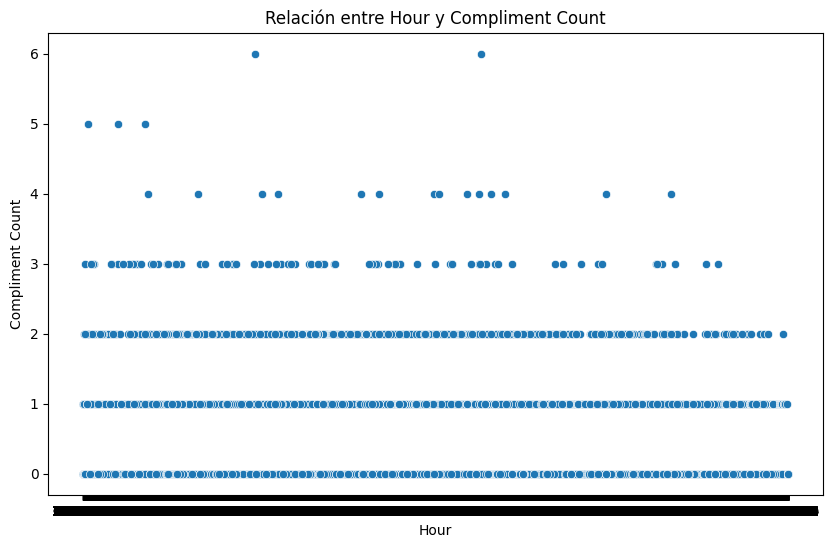

In [ ]:
# Gráfico de dispersión entre 'hour' y 'compliment_count'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hour', y='compliment_count', data=df_desanidado)
plt.title('Relación entre Hour y Compliment Count')
plt.xlabel('Hour')
plt.ylabel('Compliment Count')
plt.show()


**Relación entre Longitud del Texto y Compliment Count**

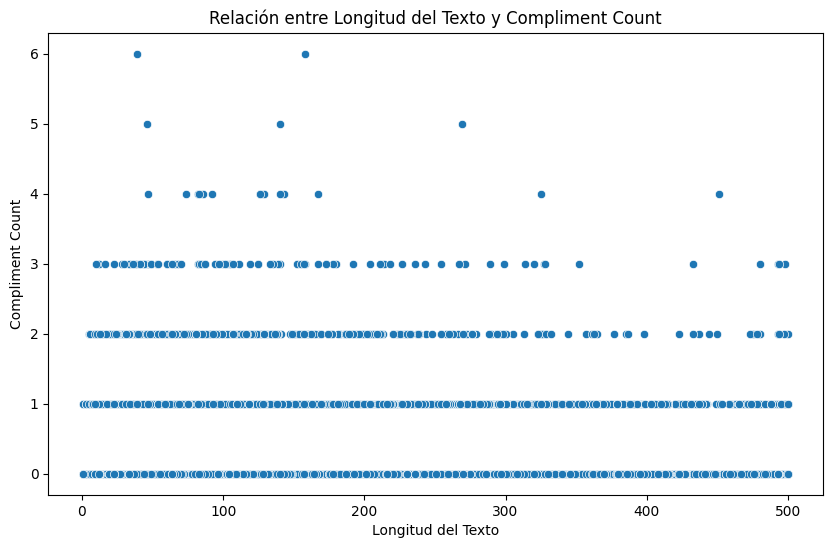

In [ ]:
# Crear una nueva columna para la longitud del texto
df_desanidado['text_length'] = df_desanidado['text'].apply(len)

# Gráfico de dispersión entre 'text_length' y 'compliment_count'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='compliment_count', data=df_desanidado)
plt.title('Relación entre Longitud del Texto y Compliment Count')
plt.xlabel('Longitud del Texto')
plt.ylabel('Compliment Count')
plt.show()


# **Lectura Checkin.json**

**Registros en el negocio.**

**// string, 22 caracteres id del negocio que se refiere al negocio en business.json**

"business_id": "tnhfDv5Il8EaGSXZGiuQGg"

**// string que es una lista de fechas separados por coma, en formato YYYY-MM-DD HH:MM:SS**

"date": "2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016-10-15 02:45:18,

2016-11-18 01:54:50, 2017-04-20 18:39:06, 2017-05-03 17:58:02"


In [ ]:

ruta_archivo = '/content/drive/MyDrive/proyecto_final/Yelp/checkin.json'

# Leer el archivo JSON en un DataFrame
df_gral_chec = pd.read_json(ruta_archivo, lines=True)

# Normalizar datos JSON anidados
df_gral_chec = pd.json_normalize(df_gral_chec.to_dict(orient='records'))


print(df_gral_chec.head())

              business_id                                               date
0  ---kPU91CF4Lq2-WlRu9Lw  2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...
1  --0iUa4sNDFiZFrAdIWhZQ  2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...
2  --30_8IhuyMHbSOcNWd6DQ           2013-06-14 23:29:17, 2014-08-13 23:20:22
3  --7PUidqRWpRSpXebiyxTg  2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...
4  --7jw19RH9JKXgFohspgQw  2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...


In [ ]:
df_gral_chec.shape

(131930, 2)

In [ ]:
df_gral_chec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


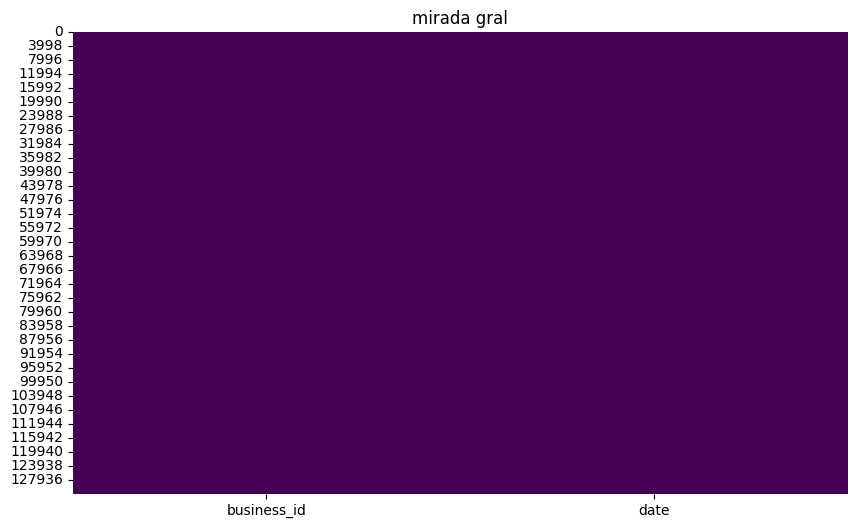

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral_chec.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_gral_chec.isnull().sum() # Revisamos si hay valores nulos.

business_id    0
date           0
dtype: int64

In [ ]:
df_gral_chec.duplicated().sum()

0

In [ ]:
#Guardar el DataFrame en un archivo CSV
#df_gral_chec.to_csv("/content/drive/MyDrive/Checkin.csv", index=True)

# **Lectura business.pkl**

**Contiene información del comercio, incluyendo localización, atributos y categorías.**


1.   "business_id": "tnhfDv5Il8EaGSXZGiuQGg"
2.   "name": "Garaje"
3.   "address": "475 3rd St"
4.   "city": "San Francisco"
5.   "state": "CA"
6.   "postal code": "94107"
7.   "latitude": 37.7817529521
8.   "longitude": -122.39612197
9.   "stars": 4.5
10.  "review_count": 1198
11.  "is_open": 1

**// objeto, atributos del negocio como valores. Algunos valores de atributos también pueden ser objetos.**

"attributes": {

    "RestaurantsTakeOut": true,

    "BusinessParking": {

        "garage": false,

        "street": true,

        "validated": false,

        "lot": false,

        "valet": false
    },

},

**// lista de categorias de los negocios**

"categories": [

    "Mexican",

    "Burgers",

    "Gastropubs"

],

**// objeto, de dia a hora, las horas son en 24hr**

   "hours": {

    "Monday": "10:00-21:00",

    "Tuesday": "10:00-21:00",

    "Friday": "10:00-21:00",

    "Wednesday": "10:00-21:00",

    "Thursday": "10:00-21:00",

    "Sunday": "11:00-18:00",
    
    "Saturday": "10:00-21:00"









In [ ]:
# Ruta del archivo pickle en Google Drive
ruta_pickle = '/content/drive/MyDrive/proyecto_final/Yelp/business.pkl'

# Leer el archivo pickle en un DataFrame
df_business = pd.read_pickle(ruta_pickle)


In [ ]:
df_business.tail(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150345,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,TN,33572,27.771002,-82.39491,4.5,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_business.shape

(150346, 28)

In [ ]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null

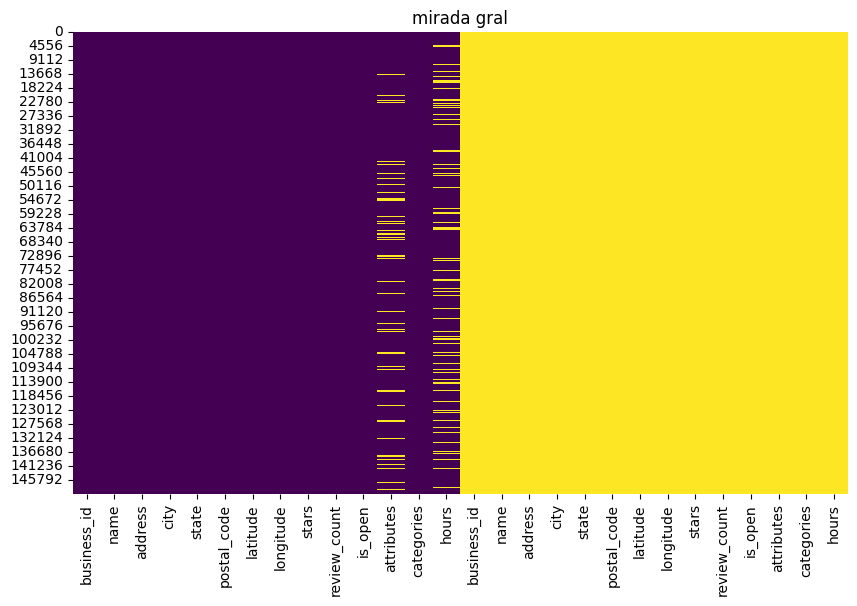

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_business.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_business = df_business.dropna(axis = 1)

In [ ]:
df_business.isnull().sum()

business_id     0
name            0
address         0
city            0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
dtype: int64

In [ ]:
df_business.duplicated().sum()

0

In [ ]:
df_business.head(2)

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,93101,34.426679,-119.711197,5.0,7,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,63123,38.551126,-90.335695,3.0,15,1


***Analisis Exploratorio de Datos***

**Name**

In [ ]:
len(df_business['name'].unique())

114117

In [ ]:
value_counts = df_business["name"].value_counts()

In [ ]:
value_counts

Starbucks                  724
McDonald's                 703
Dunkin'                    510
Subway                     459
Taco Bell                  365
                          ... 
San Roque Florist            1
Perfect Taste Grill          1
il Fustino                   1
Chong's Oriental Market      1
Sic Ink                      1
Name: name, Length: 114117, dtype: int64

In [ ]:
#Guardar el DataFrame en un archivo CSV
#df_business.to_csv("/content/drive/MyDrive/business.csv", index=True)

**Análisis de Cada Columna Representativa**

**Name Column**

Resumen de la columna 'name':
count        150346
unique       114117
top       Starbucks
freq            724
Name: name, dtype: object


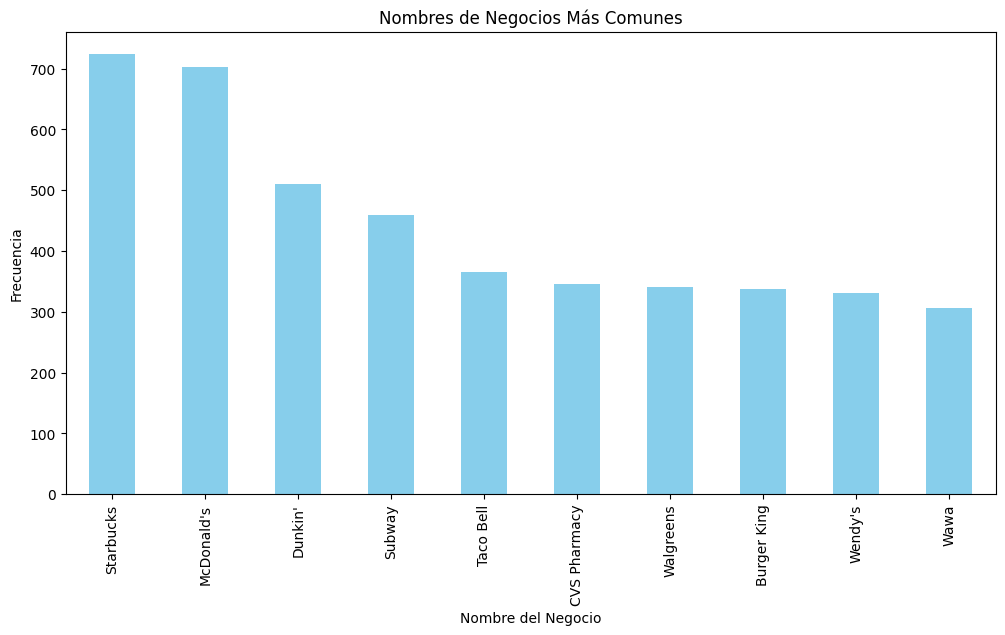

In [ ]:
# Análisis de la columna 'name'
print("Resumen de la columna 'name':")
print(df_business['name'].describe())

# Visualización de los nombres de negocios más comunes
plt.figure(figsize=(12, 6))
df_business['name'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Nombres de Negocios Más Comunes')
plt.xlabel('Nombre del Negocio')
plt.ylabel('Frecuencia')
plt.show()


---------------------------------


**City Column**

Resumen de la columna 'city':
count           150346
unique            1416
top       Philadelphia
freq             14569
Name: city, dtype: object


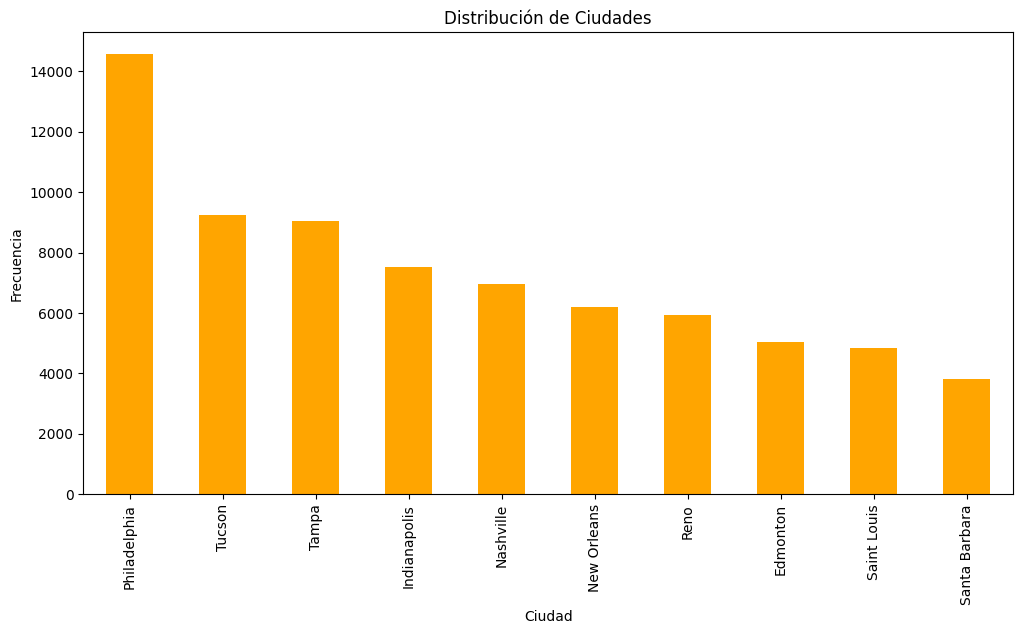

In [ ]:
# Análisis de la columna 'city'
print("Resumen de la columna 'city':")
print(df_business['city'].describe())

# Visualización de la distribución de ciudades
plt.figure(figsize=(12, 6))
df_business['city'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Distribución de Ciudades')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.show()


**Stars Column**

Resumen de la columna 'stars':
count     150346.0
unique         9.0
top            4.0
freq       31125.0
Name: stars, dtype: float64


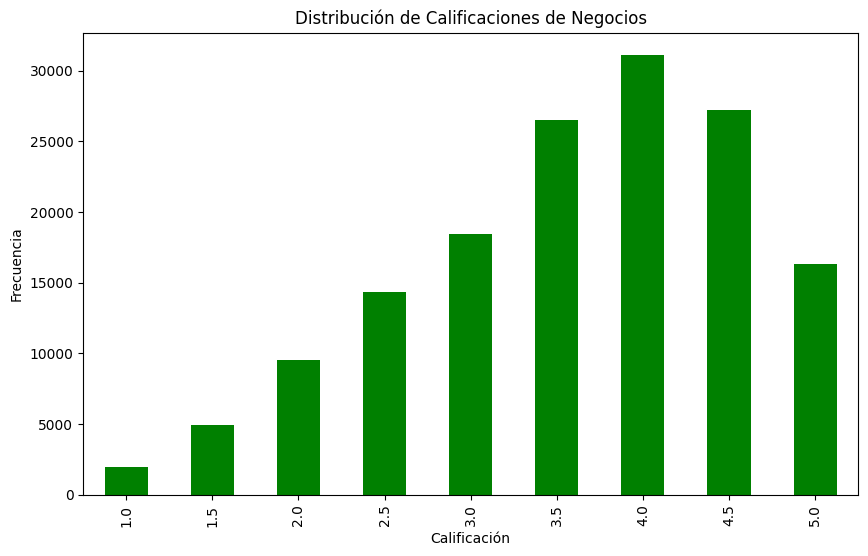

In [ ]:
# Análisis de la columna 'stars'
print("Resumen de la columna 'stars':")
print(df_business['stars'].describe())

# Visualización de la distribución de calificaciones
plt.figure(figsize=(10, 6))
df_business['stars'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Distribución de Calificaciones de Negocios')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()


**Review Count Column**

Resumen de la columna 'review_count':
count     150346
unique      1158
top            5
freq       14921
Name: review_count, dtype: int64


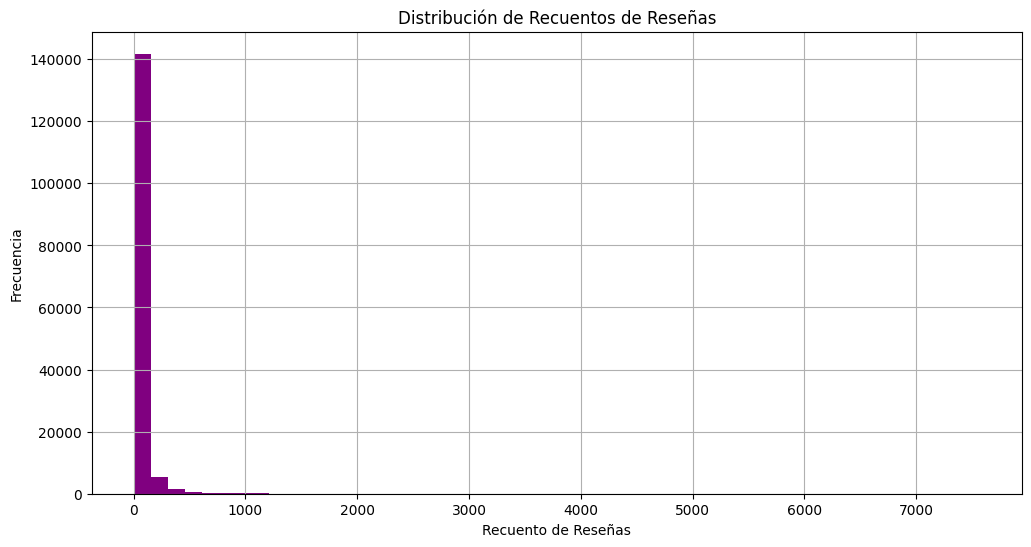

In [ ]:
# Análisis de la columna 'review_count'
print("Resumen de la columna 'review_count':")
print(df_business['review_count'].describe())

# Visualización de la distribución de recuentos de reseñas
plt.figure(figsize=(12, 6))
df_business['review_count'].hist(bins=50, color='purple')
plt.title('Distribución de Recuentos de Reseñas')
plt.xlabel('Recuento de Reseñas')
plt.ylabel('Frecuencia')
plt.show()


**Is Open Column**

Resumen de la columna 'is_open':
1    119698
0     30648
Name: is_open, dtype: int64


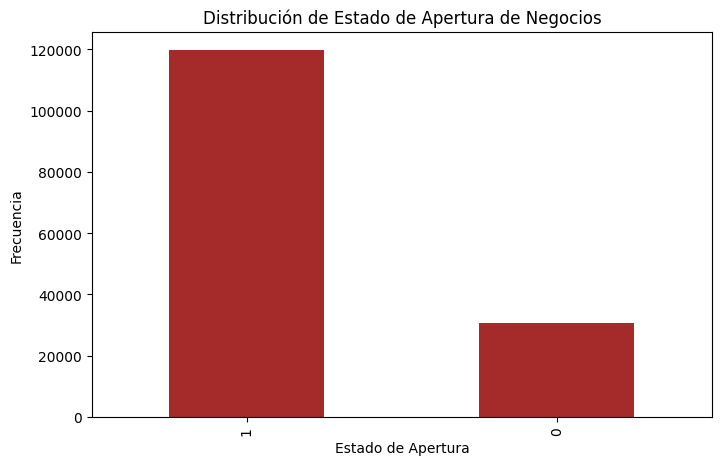

In [ ]:
# Análisis de la columna 'is_open'
print("Resumen de la columna 'is_open':")
print(df_business['is_open'].value_counts())

# Visualización de la distribución de 'is_open'
plt.figure(figsize=(8, 5))
df_business['is_open'].value_counts().plot(kind='bar', color='brown')
plt.title('Distribución de Estado de Apertura de Negocios')
plt.xlabel('Estado de Apertura')
plt.ylabel('Frecuencia')
plt.show()


**Análisis Entre Columnas**

**Relación entre Stars y Review Count**

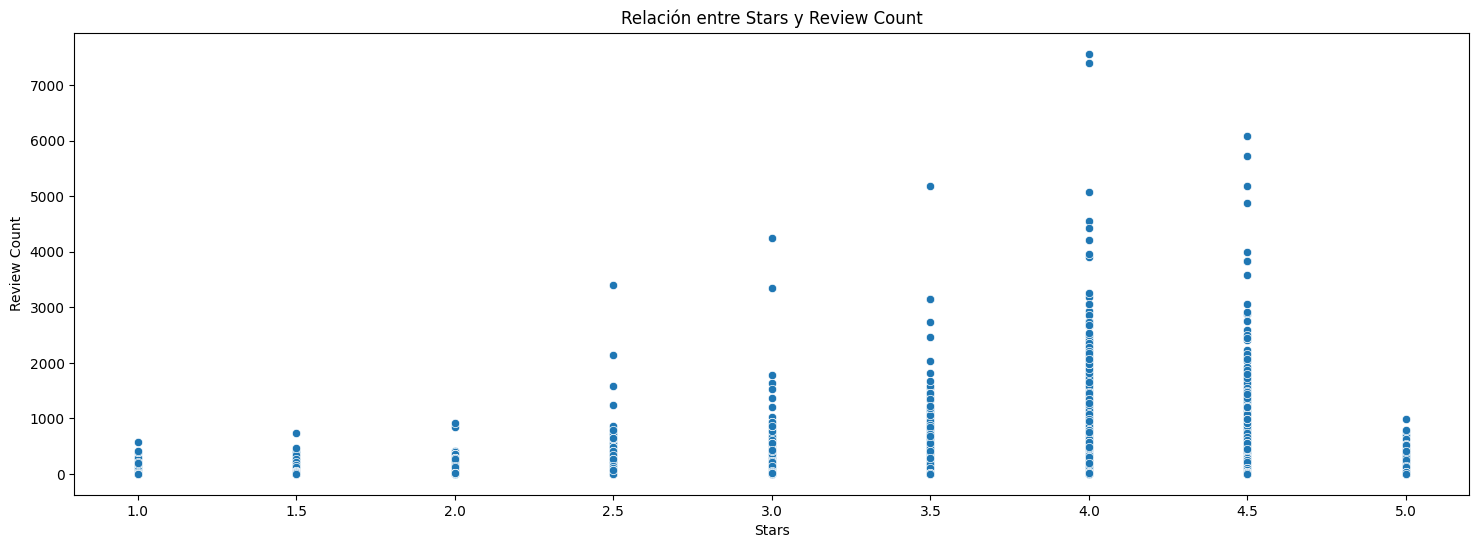

In [ ]:
# Gráfico de dispersión entre 'stars' y 'review_count'
plt.figure(figsize=(18, 6))
sns.scatterplot(x='stars', y='review_count', data=df_business)
plt.title('Relación entre Stars y Review Count')
plt.xlabel('Stars')
plt.ylabel('Review Count')
plt.show()


**Relación entre Stars y Is Open**

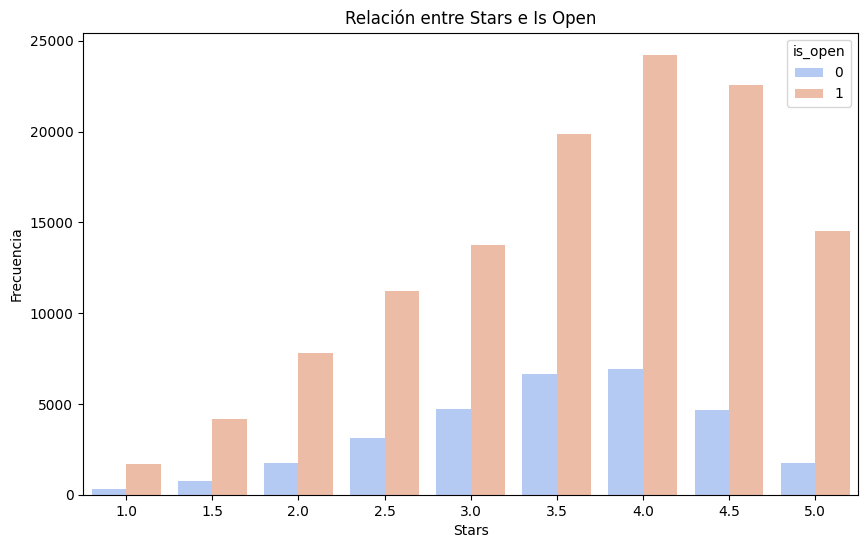

In [ ]:
# Gráfico de barras entre 'stars' y 'is_open'
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', hue='is_open', data=df_business, palette='coolwarm')
plt.title('Relación entre Stars e Is Open')
plt.xlabel('Stars')
plt.ylabel('Frecuencia')
plt.show()


-------------------

# ETL Y EDA YELP / Author: Jhon Ever Gallego Atehortua

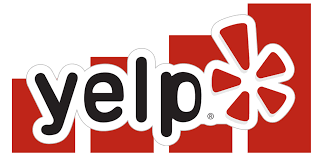

---------------

In [ ]:
from google.colab import drive # Importamos google.colab de drive
drive.mount('/content/drive') # Montamos el drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos las librerias necesarias.
import os
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Creamos una funcion para leer los archivos json.
def cargar_datos_json(ruta_archivo):
    # Lee el archivo JSON en un DataFrame
    df_json = pd.read_json(ruta_archivo, lines=True)

    # Normaliza los datos JSON en el DataFrame
    df_json_normalized = pd.json_normalize(df_json.to_dict(orient='records'))

    return df_json_normalized

# Archivo checkin.json

In [ ]:
# Cargamos los datos checkin de Yelp.
# Ruta del archivo JSON
ruta_archivo = '/content/drive/MyDrive/Proyecto Final   Grupo 02/Dataset Yelp/checkin.json'

# Cargar datos Yelp desde el archivo JSON
df_yelp_checkin = cargar_datos_json(ruta_archivo)

# Imprimir las primeras filas del DataFrame
print(df_yelp_checkin.head())

              business_id                                               date
0  ---kPU91CF4Lq2-WlRu9Lw  2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...
1  --0iUa4sNDFiZFrAdIWhZQ  2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...
2  --30_8IhuyMHbSOcNWd6DQ           2013-06-14 23:29:17, 2014-08-13 23:20:22
3  --7PUidqRWpRSpXebiyxTg  2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...
4  --7jw19RH9JKXgFohspgQw  2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...


In [ ]:
df_yelp_checkin.info() # Informacion del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [ ]:
df_yelp_checkin.isnull().sum() # Revisamos si hay valores nulos.

business_id    0
date           0
dtype: int64

In [ ]:
df_yelp_checkin.duplicated().sum() # Revisamos si hay valores duplicados.

0

In [ ]:
# Desanidamos la columna date.
desanidados = [] # Lista vacia para almacenar los datos desanidados.

for _, row in df_yelp_checkin.iterrows(): # Iteramos sobre el DataFrame.
    business_id = row['business_id'] # Obtenemos el id del negocio.
    for datetime_str in row['date'].split(', '): # Iteramos sobre la columna date.
        time, fecha = datetime_str.split(' ') # Separamos la hora de la fecha.
        desanidados.append([business_id, time, fecha]) # Agregamos los datos a la lista.

df_desanidado = pd.DataFrame(desanidados, columns=['business_id', 'date', 'hour']) # Creamos un DataFrame con los datos desanidados.

In [ ]:
df_desanidado.head() # Imprimimos las primeras filas del DataFrame.

,business_id,date,hour
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13,21:10:56
1,---kPU91CF4Lq2-WlRu9Lw,2020-06-02,22:18:06
2,---kPU91CF4Lq2-WlRu9Lw,2020-07-24,22:42:27
3,---kPU91CF4Lq2-WlRu9Lw,2020-10-24,21:36:13
4,---kPU91CF4Lq2-WlRu9Lw,2020-12-09,21:23:33


In [ ]:
# Guardamos el DataFrame en un archivo CSV en la ruta de Google Drive con un nombre de archivo.
df_desanidado.to_csv('/content/drive/MyDrive/Proyecto Final   Grupo 02/Dataset Yelp/Data limpia/checkin.csv', index=False)

Creamos un Heatmap. Este tipo de gráfico es útil para visualizar cuándo ocurren la mayoría de los eventos a lo largo de la semana y a lo largo del día.

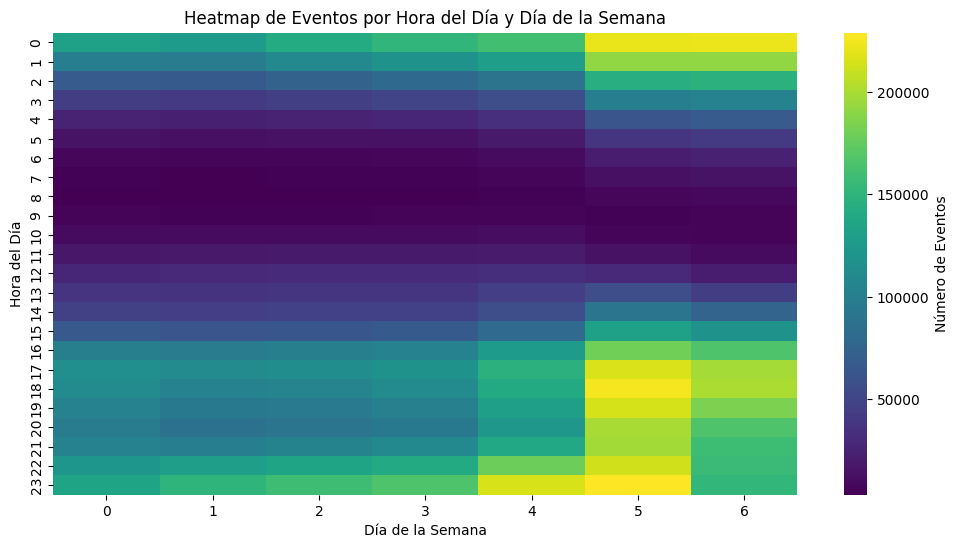

In [ ]:
# Nos aseguramos de tener las columnas 'date' y 'hour' en el formato correcto
df_desanidado['datetime'] = pd.to_datetime(df_desanidado['date'] + ' ' + df_desanidado['hour'])

# Creamos una nueva columna 'weekday' que contenga el día de la semana
df_desanidado['weekday'] = df_desanidado['datetime'].dt.dayofweek

# Creamos una nueva columna 'hour_of_day' que contenga la hora del día
df_desanidado['hour_of_day'] = df_desanidado['datetime'].dt.hour

# Creamos una tabla pivote para el heatmap
heatmap_data = df_desanidado.pivot_table(index='hour_of_day', columns='weekday', aggfunc='size', fill_value=0)

# Creamos el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Número de Eventos'})
plt.title('Heatmap de Eventos por Hora del Día y Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Hora del Día')
plt.show()

Graficamos la cantidad de Check-ins

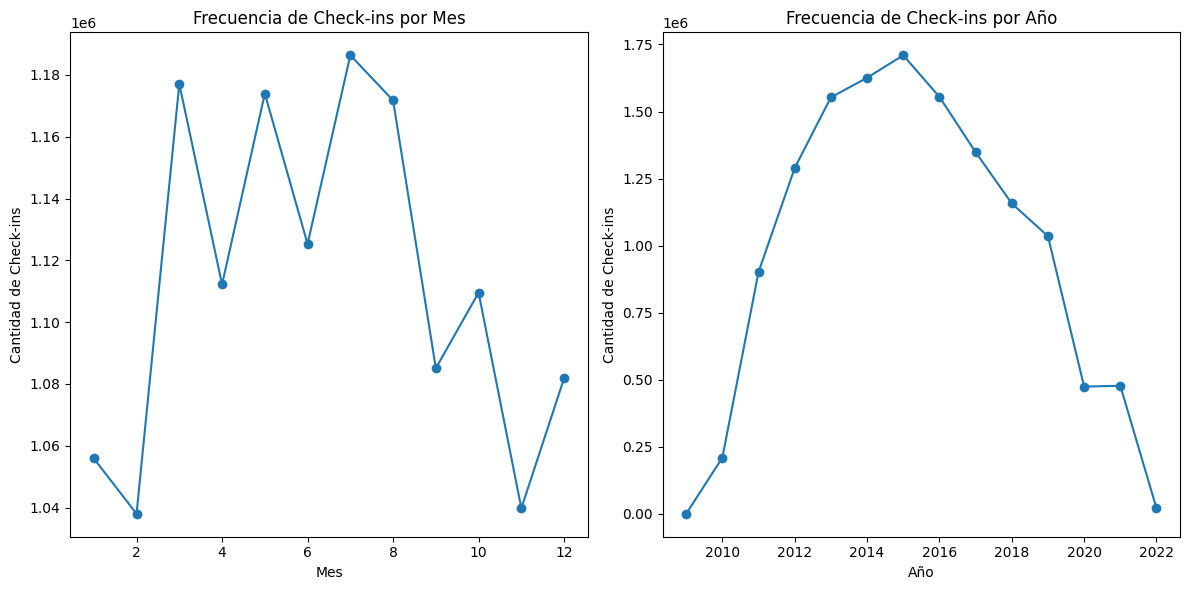

In [ ]:
# Convertir la columna 'date' al formato de fecha y hora
df_desanidado['date'] = pd.to_datetime(df_desanidado['date'])

# Agregar columnas de mes y año
df_desanidado['year'] = df_desanidado['date'].dt.year
df_desanidado['month'] = df_desanidado['date'].dt.month

# Calcular la frecuencia de check-ins por mes y por año
freq_by_month = df_desanidado.groupby('month')['business_id'].count()
freq_by_year = df_desanidado.groupby('year')['business_id'].count()

# Crear gráficos con Matplotlib
plt.figure(figsize=(12, 6))

# Gráfico por mes
plt.subplot(1, 2, 1)
plt.plot(freq_by_month.index, freq_by_month.values, marker='o')
plt.title('Frecuencia de Check-ins por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Check-ins')

# Gráfico por año
plt.subplot(1, 2, 2)
plt.plot(freq_by_year.index, freq_by_year.values, marker='o')
plt.title('Frecuencia de Check-ins por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Check-ins')

plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Archivo user.parquet

In [ ]:
ruta_archivo = '/content/drive/MyDrive/Proyecto Final   Grupo 02/Dataset Yelp/user.parquet' # Ruta del archivo.
df_user_parquet = pd.read_parquet(ruta_archivo) # Cargamos el archivo parquet.

In [ ]:
# Eliminamos datos duplicados.
df = df_user_parquet.drop_duplicates(subset=["user_id", "name"], keep="first") # Eliminamos los datos duplicados.
df_user_yelp = df_user_parquet.reindex(df.index) # Reindexamos el DataFrame.
df_user_yelp['id_user'] = df.index # Creamos una columna con el id del usuario.

Creamos y exportamos un nuevo dataframe para conservar id_user original con su user_id , el cual será usado para unir tablas

In [ ]:
df_usuario = df_user_yelp.loc[:, ["id_user",'user_id']] # Creamos un DataFrame con el id del usuario y el id del usuario de Yelp.

In [ ]:
df_usuario.rename(columns={"user_id": "yelp_id"}, inplace=True) # Renombramos la columna user_id.

In [ ]:
# Exportamos el nuevo dataframe llamado df_usuario
df_usuario.to_csv('/content/drive/MyDrive/Proyecto Final   Grupo 02/Dataset Yelp/Data limpia/Usuario_yelp.csv', index=False) # Exportamos el DataFrame a un archivo csv.

In [ ]:
df_user_yelp.drop(columns=['user_id'], inplace=True) # Eliminamos la columna user_id.

In [ ]:
df_user_yelp.head() # Imprimimos las primeras filas del DataFrame.

,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,id_user
0,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,...,55,56,18,232,844,467,467,239,180,0
1,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,...,184,157,251,1847,7054,3131,3131,1521,1946,1
2,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,...,10,17,3,66,96,119,119,35,18,2
3,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,...,1,6,2,12,16,26,26,10,9,3
4,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,...,0,0,0,1,1,0,0,0,0,4


In [ ]:
df_user_yelp.info() # Informacion del DataFrame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   name                object 
 1   review_count        int64  
 2   yelping_since       object 
 3   useful              int64  
 4   funny               int64  
 5   cool                int64  
 6   elite               object 
 7   friends             object 
 8   fans                int64  
 9   average_stars       float64
 10  compliment_hot      int64  
 11  compliment_more     int64  
 12  compliment_profile  int64  
 13  compliment_cute     int64  
 14  compliment_list     int64  
 15  compliment_note     int64  
 16  compliment_plain    int64  
 17  compliment_cool     int64  
 18  compliment_funny    int64  
 19  compliment_writer   int64  
 20  compliment_photos   int64  
 21  id_user             int64  
dtypes: float64(1), int64(17), object(4)
memory usage: 348.8+ MB


In [ ]:
# Transformamos los tipos de datos de las columnas.
df_user_yelp['name'] = df['name'].astype(str) # Cambiamos el tipo de dato de la columna name a string.

df_user_yelp['yelping_since'] = pd.to_datetime(df['yelping_since']) # Cambiamos el tipo de dato de la columna yelping_since a datetime.

df_user_yelp['years'] = df['elite'].str.split(',') # Separamos los datos de la columna elite.

years_df = df_user_yelp[['id_user', 'years']].explode('years') # Creamos un DataFrame con los datos de la columna years.

years_df['years'] = years_df['years'].replace("", np.nan) # Reemplazamos los valores vacios por NaN.

years_df['years'] = years_df['years'].replace("20", "2020") # Reemplazamos los valores 20 por 2020.

In [ ]:
years_df.head()

,id_user,years
0,0,2007
1,1,2009
1,1,2010
1,1,2011
1,1,2012


In [ ]:
# Guardamos el DataFrame en un archivo CSV en la ruta de Google Drive con un nombre de archivo.
years_df.to_csv('/content/drive/MyDrive/Proyecto Final   Grupo 02/Dataset Yelp/Data limpia/Usuario_elite.csv', index=False)

In [ ]:
df_user_yelp.drop(columns=['elite'], inplace=True) # Eliminamos la columna elite del DataFrame original.
df_user_yelp.drop(columns=['years'], inplace=True) # Eliminamos la columna years del DataFrame original.

In [ ]:
df_user_yelp.head()

,name,review_count,yelping_since,useful,funny,cool,friends,fans,average_stars,compliment_hot,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,id_user
0,Walker,585,2007-01-25 16:47:26,7217,1259,5994,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,...,55,56,18,232,844,467,467,239,180,0
1,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,...,184,157,251,1847,7054,3131,3131,1521,1946,1
2,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,89,...,10,17,3,66,96,119,119,35,18,2
3,Gwen,224,2005-11-29 04:38:33,512,330,299,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,...,1,6,2,12,16,26,26,10,9,3
4,Karen,79,2007-01-05 19:40:59,29,15,7,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,...,0,0,0,1,1,0,0,0,0,4


In [ ]:
# Guardamos el DataFrame en un archivo CSV en la ruta de Google Drive con un nombre de archivo.
df_user_yelp.to_csv('/content/drive/MyDrive/Proyecto Final   Grupo 02/Dataset Yelp/Data limpia/user_yelp.csv', index=False)

Creamos un histograma de Average Stars, donde podemos ver la distribución de las calificaciones promedio dadas por los usuarios

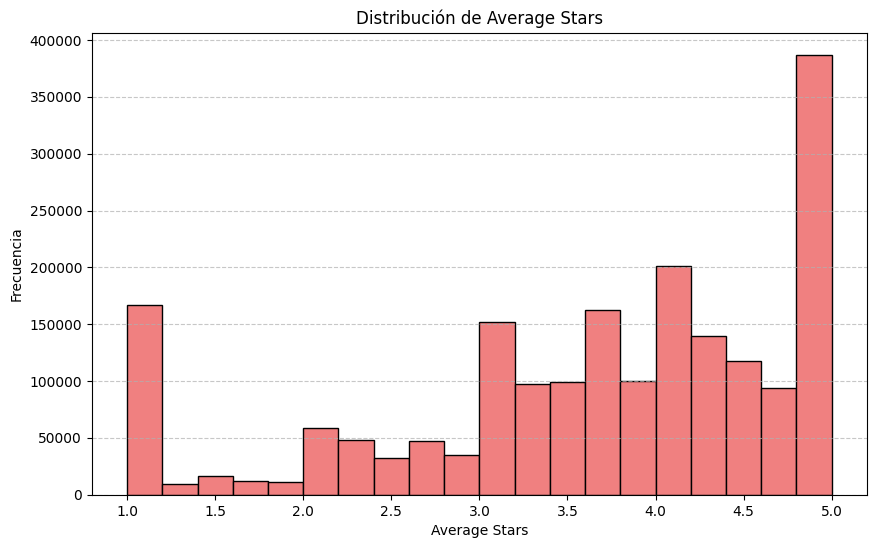

In [ ]:
plt.figure(figsize=(10, 6)) # Tamaño de la figura
plt.hist(df_user_yelp['average_stars'], bins=20, color='lightcoral', edgecolor='black') # Histograma
plt.title('Distribución de Average Stars') # Titulo
plt.xlabel('Average Stars') # Etiqueta eje x
plt.ylabel('Frecuencia') # Etiqueta eje y
plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadricula
plt.show() # Mostrar grafico

Creamos un Boxplot de Average Star, donde podemos explorar si hay variaciones en las calificaciones promedio según el día de la semana en que los usuarios comenzaron en Yelp.

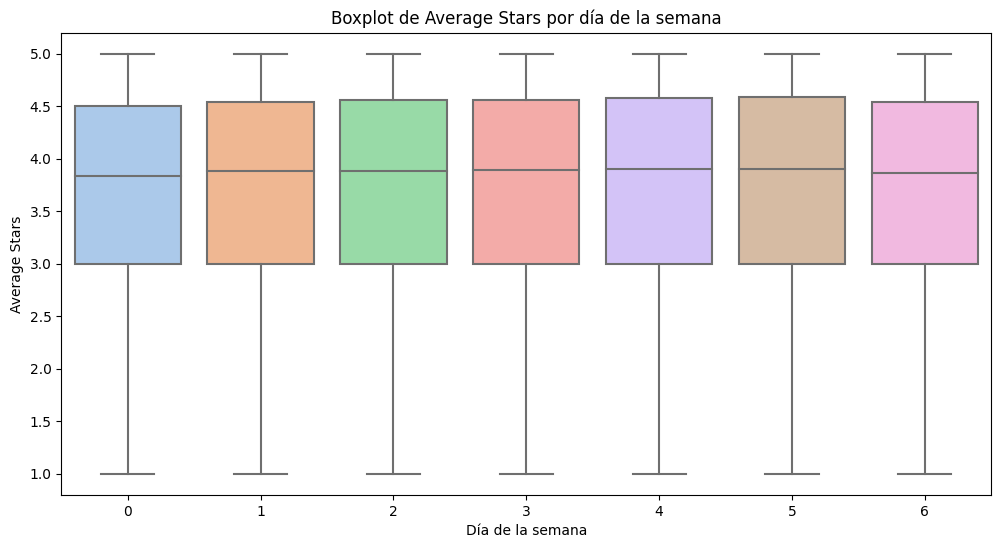

In [ ]:
df_user_yelp['day_of_week'] = df_user_yelp['yelping_since'].dt.dayofweek # 0 es lunes y 6 es domingo
plt.figure(figsize=(12, 6)) # Tamaño de la figura
sns.boxplot(x='day_of_week', y='average_stars', data=df_user_yelp, palette='pastel') # Boxplot
plt.title('Boxplot de Average Stars por día de la semana') # Titulo
plt.xlabel('Día de la semana') # Etiqueta eje x
plt.ylabel('Average Stars') # Etiqueta eje y
plt.show() # Mostrar figura

Creamos un heatmap, donde podemos explorar la relación entre diferentes métricas mediante un mapa de calor de correlación.

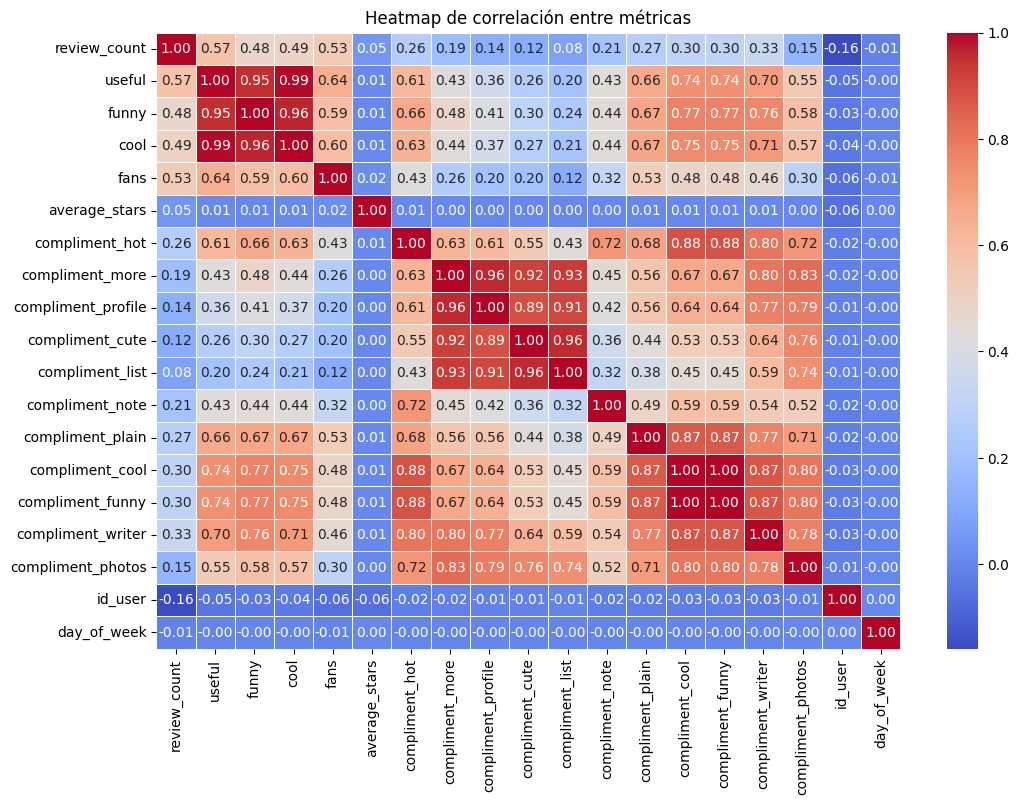

In [ ]:
correlation_matrix = df_user_yelp.corr(numeric_only=True) # Calcula la correlación entre las columnas numéricas

plt.figure(figsize=(12, 8)) # Tamaño de la figura
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5) # Heatmap de correlación
plt.title('Heatmap de correlación entre métricas') # Título
plt.show() # Mostrar figura

Creamos un grafico de barras con el top 10 de usuarios con mayor review count

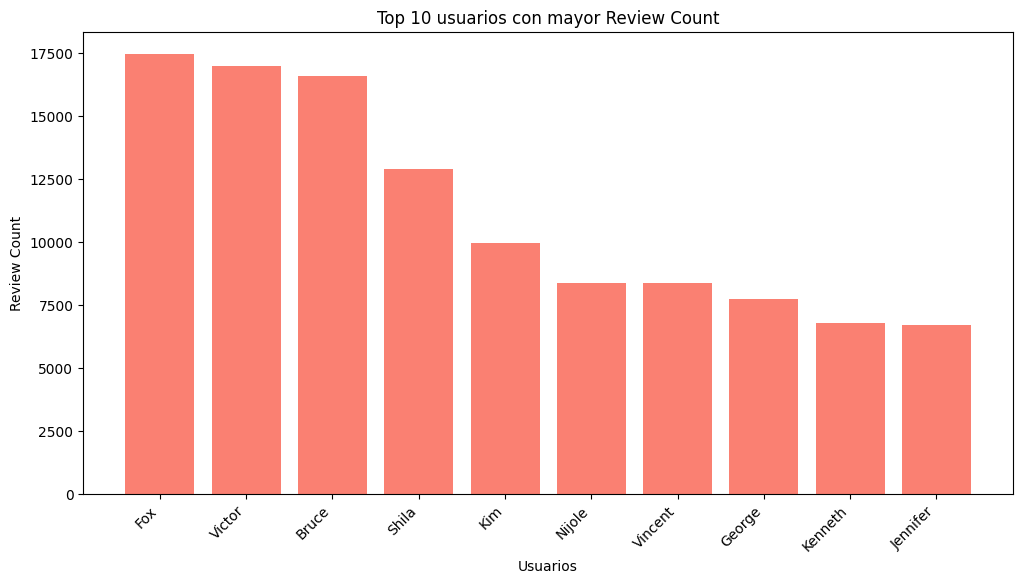

In [ ]:
top_n = 10 # Top 10 de usuarios con mayor review count
top_users = df_user_yelp.nlargest(top_n, 'review_count') # Top 10 de usuarios con mayor review count
plt.figure(figsize=(12, 6)) # Tamaño de la figura
plt.bar(top_users['name'], top_users['review_count'], color='salmon') # Grafico de barras
plt.title(f'Top {top_n} usuarios con mayor Review Count') # Titulo
plt.xlabel('Usuarios') # Etiqueta eje x
plt.ylabel('Review Count') # Etiqueta eje y
plt.xticks(rotation=45, ha='right') # Rotacion de las etiquetas del eje x
plt.show() # Mostrar grafico

Creamos un grafico con el top de usuarios que tiene mas amigos

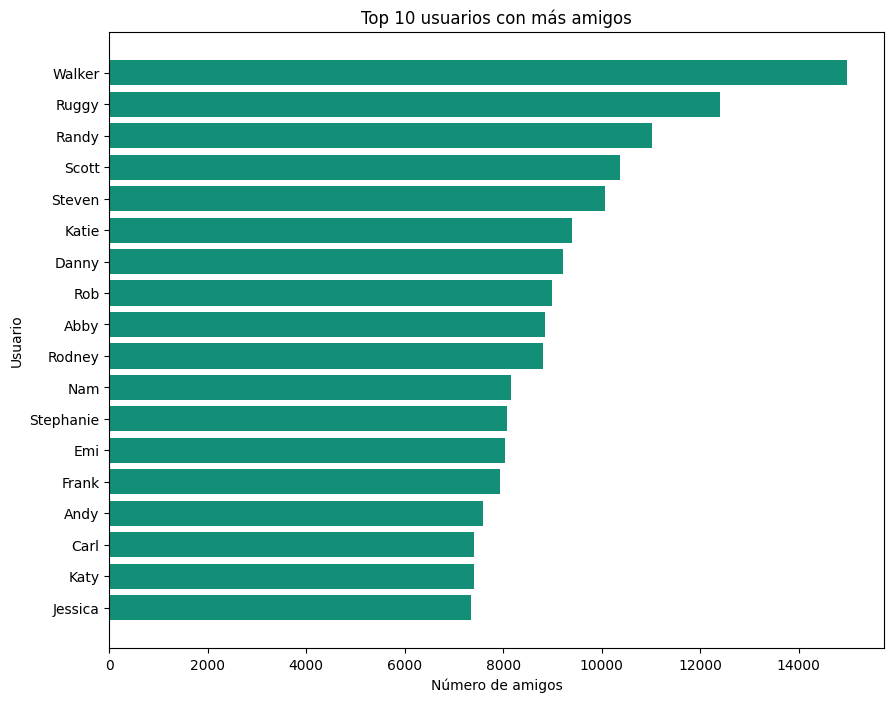

In [ ]:
# Calcular la cantidad de IDs de amigos en cada fila
df_user_yelp['num_friends'] = df_user_yelp['friends'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Ordenar el DataFrame por la cantidad de amigos en orden descendente
df_sorted = df_user_yelp.sort_values(by='num_friends', ascending=False)

# Tomar el top de usuarios con más amigos
top_users = df_sorted.head(18)

# Crear un gráfico de barras con la paleta de colores verde
plt.figure(figsize=(10, 8))
plt.barh(top_users['name'], top_users['num_friends'], color="#148F77")
plt.xlabel('Número de amigos')
plt.ylabel('Usuario')
plt.title('Top 10 usuarios con más amigos')
plt.gca().invert_yaxis()
plt.show()

Creamos un grafico con el top de usuarios con mas fans

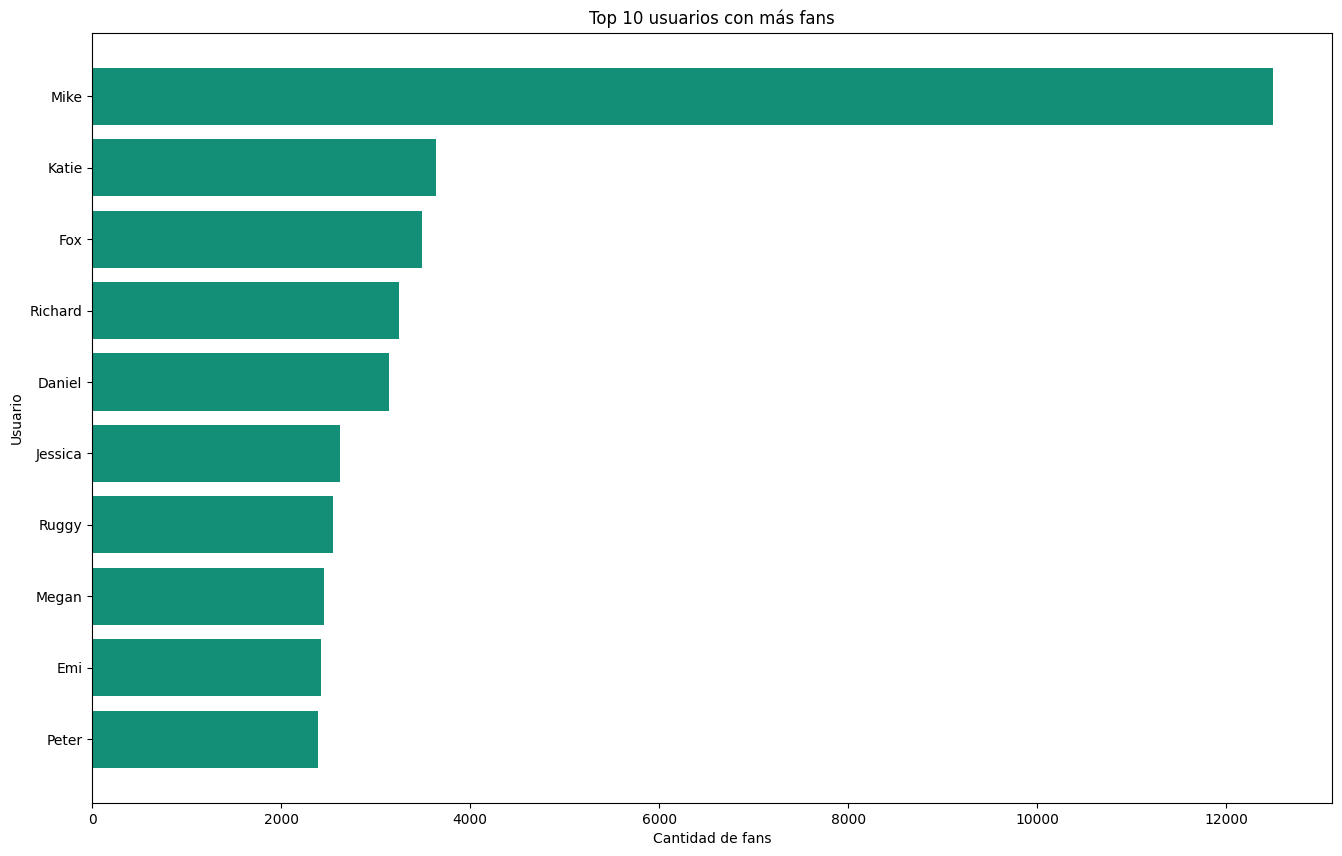

In [ ]:
# Calcular el top 10 de usuarios con más fans
top_fans = df_user_yelp.nlargest(10, 'fans')

# Crear un gráfico de barras para visualizar el top 10 de usuarios con más fans
plt.figure(figsize=(16, 10))
plt.barh(top_fans['name'], top_fans['fans'], color="#148F77")
plt.xlabel('Cantidad de fans')
plt.ylabel('Usuario')
plt.title('Top 10 usuarios con más fans')
plt.gca().invert_yaxis()
plt.show()

Creamos un grafico de pastel, donde podmeos visualizar la distribución proporcional de diferentes tipos de compliments.

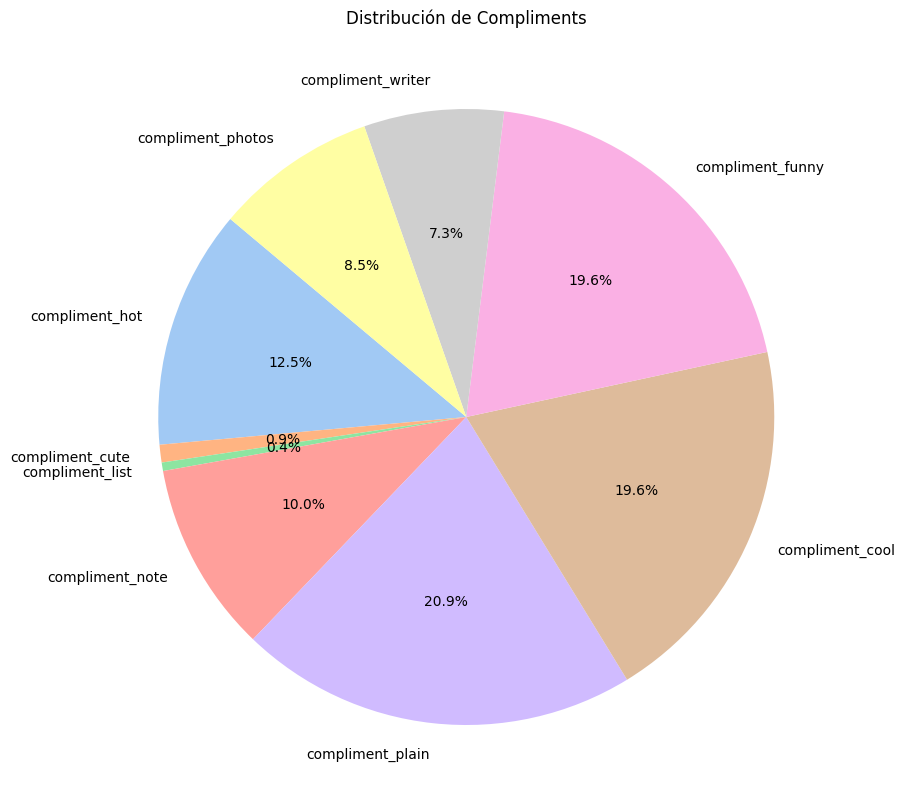

In [ ]:
compliments_columns = ['compliment_hot', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']
compliments_sum = df_user_yelp[compliments_columns].sum()
plt.figure(figsize=(10, 10))
plt.pie(compliments_sum, labels=compliments_sum.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Distribución de Compliments')
plt.show()

# Archivo business.plk

In [ ]:
df_business = pd.read_pickle('/content/drive/MyDrive/Proyecto Final   Grupo 02/Dataset Yelp/business.pkl') # Cargamos el archivo pickle.

In [ ]:
df_business.head() # Imprimimos las primeras filas del DataFrame.

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_business.info() # Informacion del DataFrame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null

In [ ]:
df_business = df_business.loc[:, ~df_business.columns.duplicated()] # Eliminamos las columnas duplicadas.

In [ ]:
# Número de filas a desplazar hacia arriba
num_rows = 3

# Desplazar la columna hacia arriba
df_business["state"] = df_business["state"].shift(-num_rows) # Desplazamos la columna state.

In [ ]:
duplicates_count = df_business['categories'].duplicated().sum() # Contamos los valores duplicados en la columna categories.

print("Cantidad de duplicados en 'categories':", duplicates_count) # Imprimimos la cantidad de duplicados.

Cantidad de duplicados en 'categories': 67185


In [ ]:
df_business = df_business.dropna(subset=['categories']) # Eliminamos los valores nulos de la columna categories.

In [ ]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


Creamos un codigo para saber cual es la categoria que contiene mayor numero de reviews

In [ ]:
# Crear un nuevo DataFrame donde cada fila contiene una categoría y el review_count correspondiente
category_df = pd.DataFrame([(category, row['review_count']) for _, row in df_business.iterrows() for category in row['categories']], columns=['category', 'review_count'])

# Encontrar la categoría con el mayor review_count
max_review_category = category_df.groupby('category')['review_count'].sum().idxmax()
max_review_count = category_df.groupby('category')['review_count'].sum().max()

print(f"La categoría con el mayor review_count es: {max_review_category}")
print(f"El review_count máximo en esa categoría es: {max_review_count}")

La categoría con el mayor review_count es:  
El review_count máximo en esa categoría es: 48984074


Filtramos nuestro dataframe por restaurantes para hacer un analisis.

In [ ]:
df_business_restaurantes = df_business[df_business['categories'].str.lower().str.startswith('restaurants')] # Filtramos los datos que empiezan con la palabra restaurant.

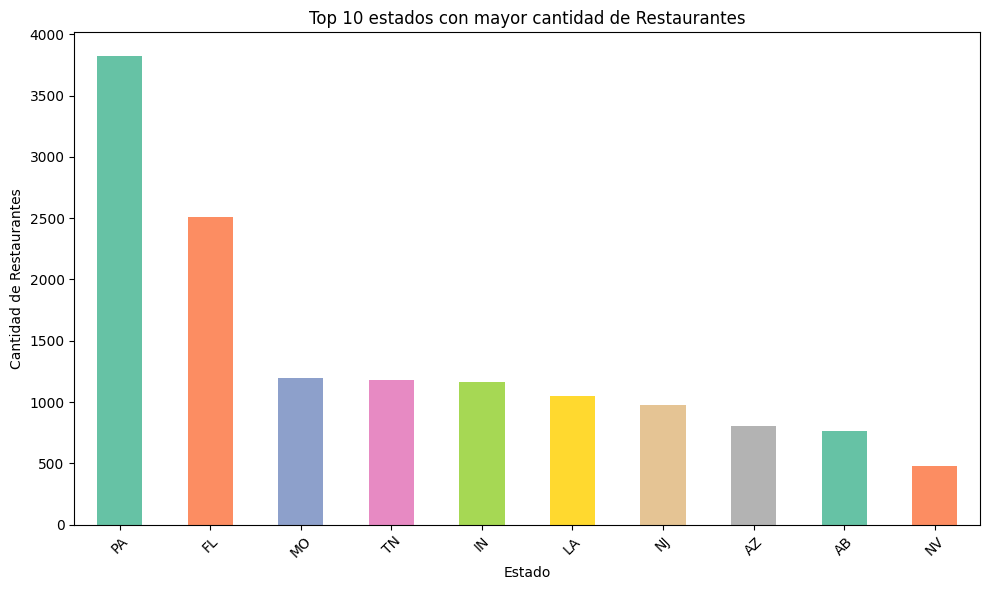

In [ ]:
# Calcular la frecuencia de cada estado
state_counts = df_business_restaurantes["state"].value_counts()

# Tomar el top 10 estados más comunes
top_states = state_counts.head(10)

# Crear una paleta de colores más vívida (cambiando a "Set2")
vivid_palette = sns.color_palette("Set2", len(top_states))

# Crear un gráfico de barras para visualizar los estados más comunes
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color=vivid_palette)
plt.xlabel('Estado')
plt.ylabel('Cantidad de Restaurantes')
plt.title('Top 10 estados con mayor cantidad de Restaurantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

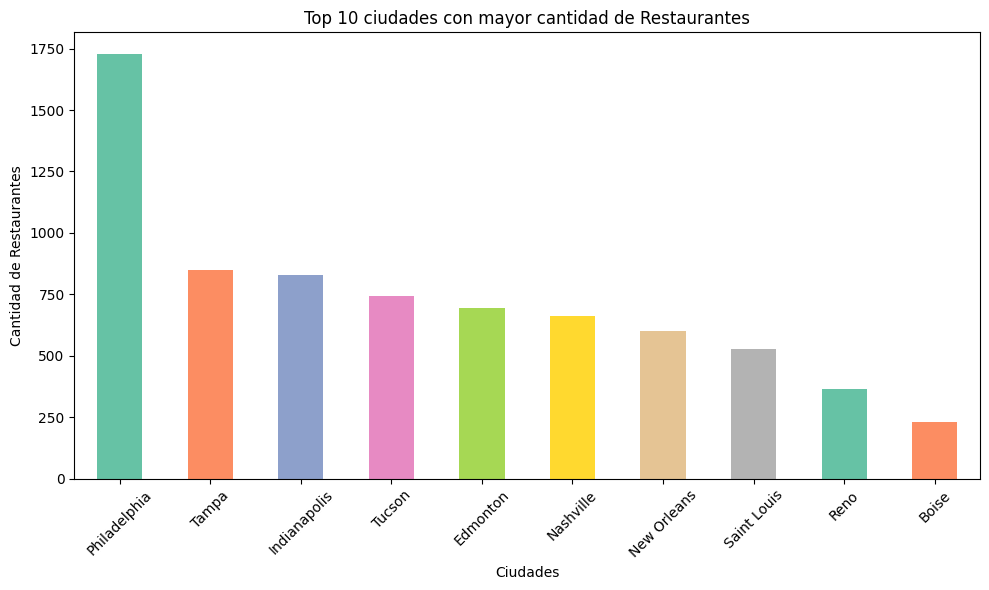

In [ ]:
# Calcular la frecuencia de cada ciudad
city_counts = df_business_restaurantes["city"].value_counts()

# Tomar el top 10 ciudades más comunes
top_cities = city_counts.head(10)

# Crear una paleta de colores más vívida (cambiando a "Set2")
vivid_palette = sns.color_palette("Set2", len(top_cities))

# Crear un gráfico de barras para visualizar las ciudades más comunes
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color=vivid_palette)
plt.xlabel('Ciudades')
plt.ylabel('Cantidad de Restaurantes')
plt.title('Top 10 ciudades con mayor cantidad de Restaurantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Filtramos nuestro dataframe por hoteles para hacer un analisis.

In [ ]:
df_business_hotel = df_business[df_business['categories'].str.lower().str.startswith('hotel')] # Filtramos los datos que empiezan con la palabra hotel.

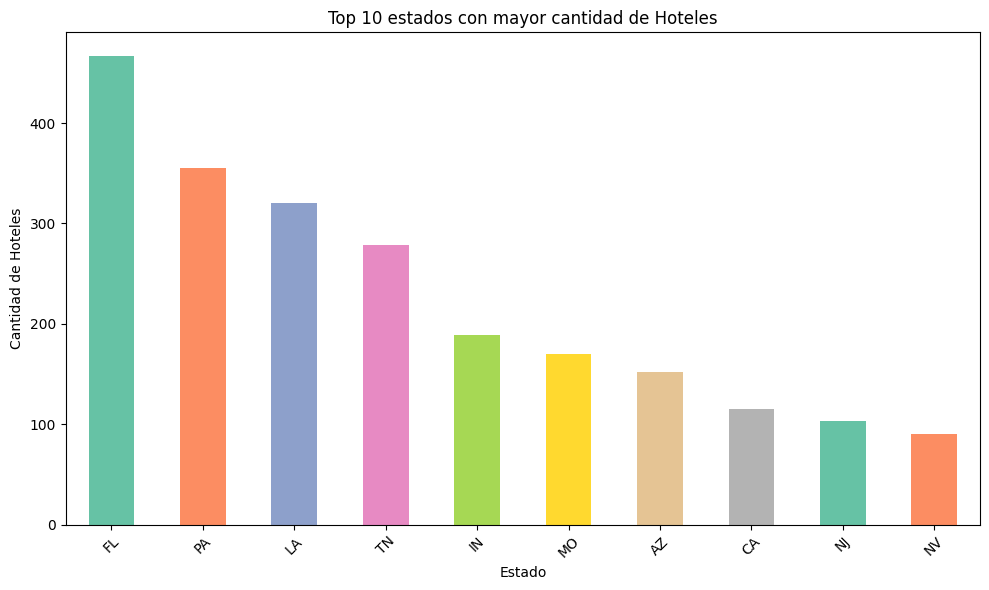

In [ ]:
# Calcular la frecuencia de cada estado
state_counts = df_business_hotel["state"].value_counts()

# Tomar el top 10 estados más comunes
top_states = state_counts.head(10)

# Crear una paleta de colores más vívida (cambiando a "Set2")
vivid_palette = sns.color_palette("Set2", len(top_states))

# Crear un gráfico de barras para visualizar los estados más comunes
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color=vivid_palette)
plt.xlabel('Estado')
plt.ylabel('Cantidad de Hoteles')
plt.title('Top 10 estados con mayor cantidad de Hoteles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

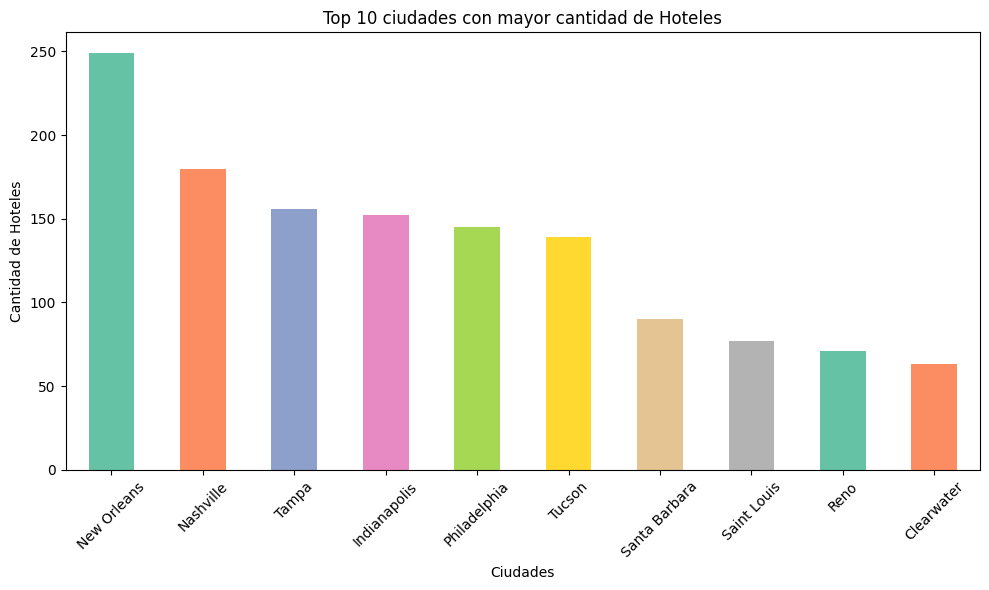

In [ ]:
# Calcular la frecuencia de cada ciudad
city_counts = df_business_hotel["city"].value_counts()

# Tomar el top 10 ciudades más comunes
top_cities = city_counts.head(10)

# Crear una paleta de colores más vívida (cambiando a "Set2")
vivid_palette = sns.color_palette("Set2", len(top_cities))

# Crear un gráfico de barras para visualizar las ciudades más comunes
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color=vivid_palette)
plt.xlabel('Ciudades')
plt.ylabel('Cantidad de Hoteles')
plt.title('Top 10 ciudades con mayor cantidad de Hoteles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Filtramos nuestro dataframe por department stores para hacer un analisis.

In [ ]:
df_business_stores = df_business[df_business['categories'].str.lower().str.startswith('department stores')] # Filtramos los datos que empiezan con la palabra hotel.

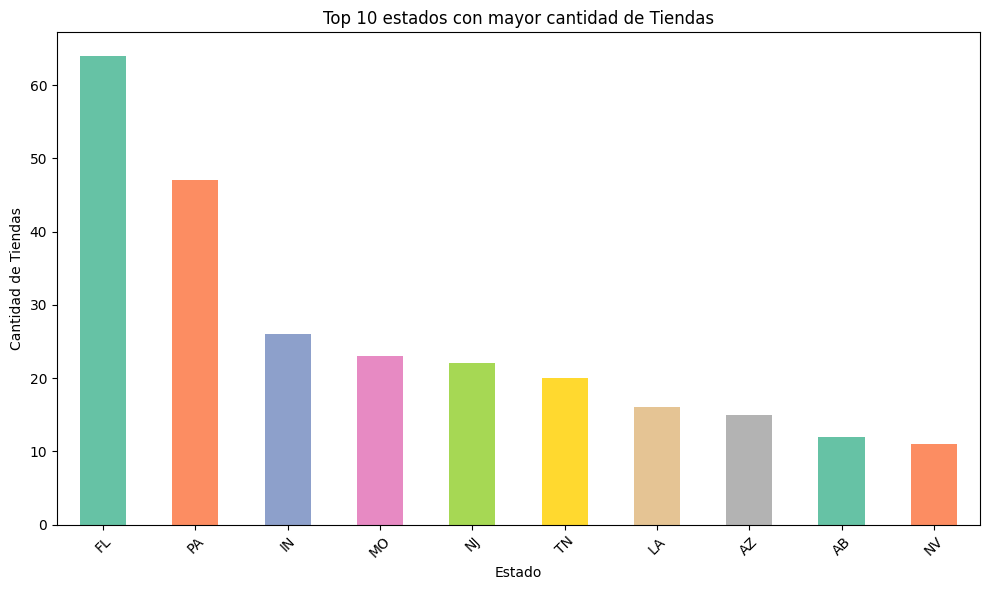

In [ ]:
# Calcular la frecuencia de cada estado
state_counts = df_business_stores["state"].value_counts()

# Tomar el top 10 estados más comunes
top_states = state_counts.head(10)

# Crear una paleta de colores más vívida (cambiando a "Set2")
vivid_palette = sns.color_palette("Set2", len(top_states))

# Crear un gráfico de barras para visualizar los estados más comunes
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color=vivid_palette)
plt.xlabel('Estado')
plt.ylabel('Cantidad de Tiendas')
plt.title('Top 10 estados con mayor cantidad de Tiendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

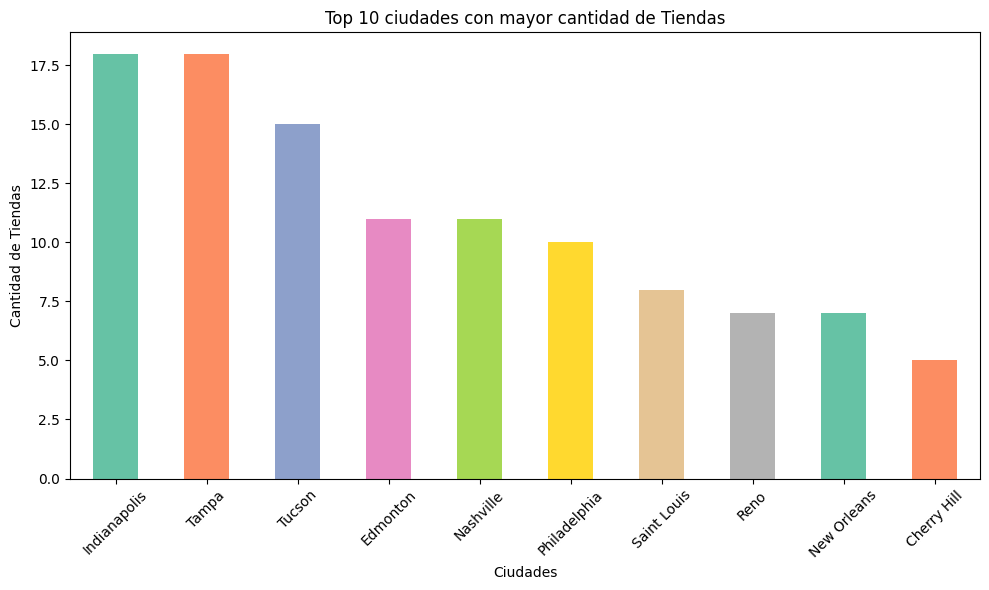

In [ ]:
# Calcular la frecuencia de cada ciudad
city_counts = df_business_stores["city"].value_counts()

# Tomar el top 10 ciudades más comunes
top_cities = city_counts.head(10)

# Crear una paleta de colores más vívida (cambiando a "Set2")
vivid_palette = sns.color_palette("Set2", len(top_cities))

# Crear un gráfico de barras para visualizar las ciudades más comunes
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color=vivid_palette)
plt.xlabel('Ciudades')
plt.ylabel('Cantidad de Tiendas')
plt.title('Top 10 ciudades con mayor cantidad de Tiendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Archivo tip.json

In [ ]:
# Cargamos los datos tip de Yelp.
# Ruta del archivo JSON
ruta_archivo = '/content/drive/MyDrive/Proyecto Final   Grupo 02/Dataset Yelp/tip.json'

# Cargar datos Yelp desde el archivo JSON
df_yelp_tip = cargar_datos_json(ruta_archivo)

# Imprimir las primeras filas del DataFrame
print(df_yelp_tip.head())

                  user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3  FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4  ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   

                                                text                date  \
0                     Avengers time with the ladies. 2012-05-18 02:17:21   
1  They have lots of good deserts and tasty cuban... 2013-02-05 18:35:10   
2             It's open even when you think it isn't 2013-08-18 00:56:08   
3                          Very decent fried chicken 2017-06-27 23:05:38   
4             Appetizers.. platter special for lunch 2012-10-06 19:43:09   

   compliment_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [ ]:
df_yelp_tip.info() # Informacion del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


In [ ]:
df_yelp_tip.head() # Imprimimos las primeras filas del DataFrame.

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [ ]:
duplicates_count = df_yelp_tip['user_id'].duplicated().sum() # Cantidad de duplicados en 'user_id'
print("Cantidad de duplicados en 'user_id':", duplicates_count) # Imprimir cantidad de duplicados en 'user_id'

Cantidad de duplicados en 'user_id': 607157


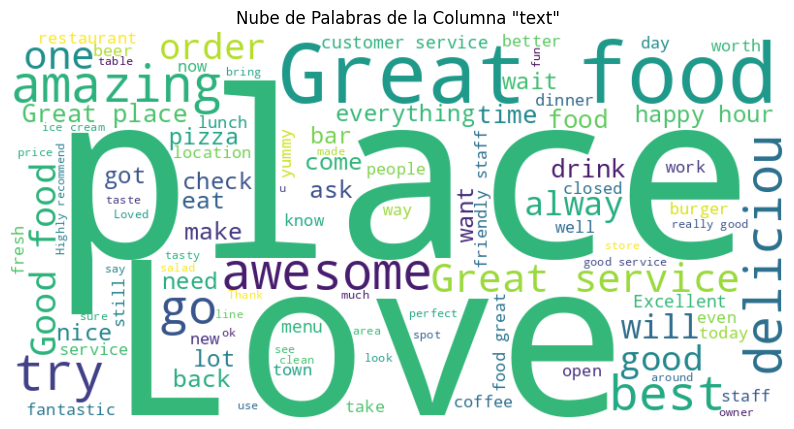

In [ ]:
all_text = ' '.join(df_yelp_tip['text']) # Concatenamos todos los textos en una sola cadena de texto.

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text) # Creamos la nube de palabras.

plt.figure(figsize=(10, 6)) # Tamaño de la figura.
plt.imshow(wordcloud, interpolation='bilinear') # Mostramos la nube de palabras.
plt.axis('off') # Eliminamos los ejes.
plt.title('Nube de Palabras de la Columna "text"') # Titulo de la nube de palabras.
plt.show() # Mostramos la nube de palabras.

Top 10 usuarios que más se Repiten:
fCvMnJU1Z-XhAjKg99wK3Q    4071
5Y5KbsI5buMcNh2hTFaRpA    1385
lMY8NBPyzlPbbu-KBYfD9A    1373
Rr4cLb6Go91FT134o6RsKg    1230
qjfMBIZpQT9DDtw_BWCopQ    1230
-G7Zkl1wIWBBmD0KRy_sCw    1035
sraTrYU-7q_bQ0TxQrLJvQ     902
I2XpWCHAom1JRyHXZQrnfg     821
xWmYN57XXZbg0LOK8WbbFQ     813
zYFGMy1_thjMnvQLX6JNBw     782
Name: user_id, dtype: int64


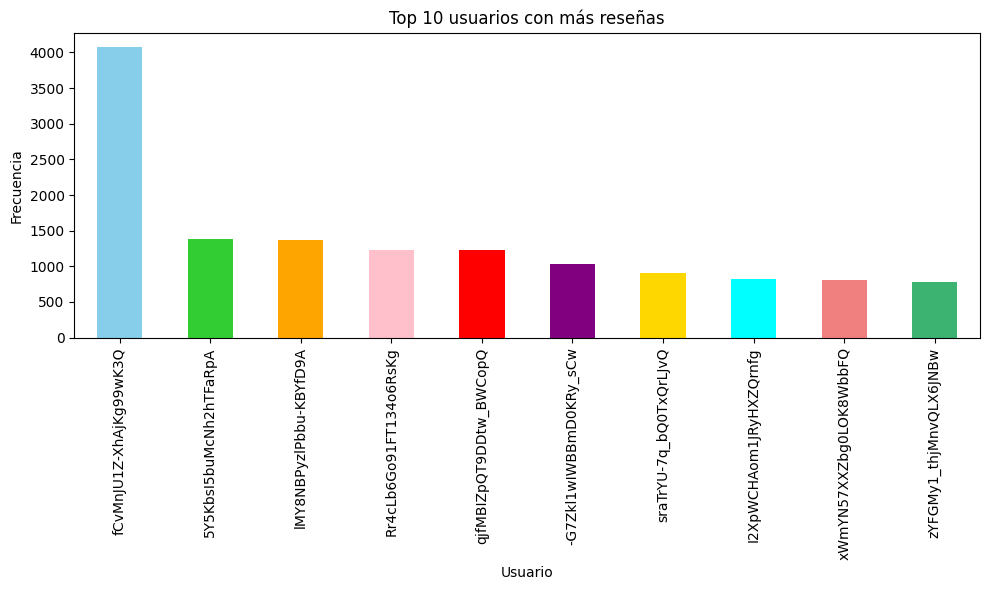

In [ ]:
user_id_counts = df_yelp_tip['user_id'].value_counts() # Cuenta la cantidad de veces que se repite cada usuario

top_users = user_id_counts.head(10) # Selecciona los 10 usuarios que más se repiten

print("Top 10 usuarios que más se Repiten:") # Imprime el título
print(top_users) # Imprime los 10 usuarios que más se repiten

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) # Tamaño de la figura
top_users.plot(kind='bar', color=['skyblue', 'limegreen', 'orange', 'pink', 'red', 'purple', 'gold', 'cyan', 'lightcoral', 'mediumseagreen']) # Gráfica de barras con colores vivos
plt.xlabel('Usuario') # Etiqueta del eje x
plt.ylabel('Frecuencia') # Etiqueta del eje y
plt.title('Top 10 usuarios con más reseñas') # Título del gráfico
plt.xticks(rotation=90) # Rota las etiquetas del eje x 90 grados
plt.tight_layout() # Ajusta la figura
plt.show() # Muestra la figura

-----------------